# 🔹UFC Fight Predictor Feature Engineering

<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

# Import Libraries and Setup Environment

In [18]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import pickle
logging.basicConfig(level=logging.INFO, format='[%(levelname)s] %(message)s')
logger = logging.getLogger(__name__)

# Get the current working directory
current_dir = os.getcwd()

# Navigate to the project root
project_root = os.path.abspath(os.path.join(current_dir, '..'))

# Import from /src
sys.path.append(os.path.join(project_root))
from src.data import UFCData

<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

# Load Data

In [2]:
# Define the path to the CSV file
file_path = os.path.join(project_root, 'data', 'processed', 'ufc_etl.csv')

# Load the CSV into a DataFrame
try:
    ufc_df = pd.read_csv(file_path)
    logger.info(f"✅ Data successfully loaded: {ufc_df.shape[0]} rows, {ufc_df.shape[1]} columns.")
except Exception as e:
    logger.error(f"❌ Error loading data: {e}")

[INFO] ✅ Data successfully loaded: 5594 rows, 345 columns.


# Initial Drop for Modeling

In [3]:
for col in ufc_df.columns:
    print(col)

event_id
event_name
date
location
fight_id
division
title_fight
method
finish_round
match_time_sec
total_rounds
referee
r_name
r_id
r_kd
r_sig_str_landed
r_sig_str_atmpted
r_sig_str_acc
r_total_str_landed
r_total_str_atmpted
r_total_str_acc
r_td_landed
r_td_atmpted
r_sub_att
r_ctrl
r_head_landed
r_head_atmpted
r_head_acc
r_body_landed
r_body_atmpted
r_body_acc
r_leg_landed
r_leg_atmpted
r_leg_acc
r_dist_landed
r_dist_atmpted
r_dist_acc
r_clinch_landed
r_clinch_atmpted
r_clinch_acc
r_ground_landed
r_ground_atmpted
r_ground_acc
r_landed_head_per
r_landed_body_per
r_landed_leg_per
r_landed_dist_per
r_landed_clinch_per
r_landed_ground_per
r_height
r_weight
r_reach
r_stance
r_dob
r_td_avg_acc
b_name
b_id
b_kd
b_sig_str_landed
b_sig_str_atmpted
b_sig_str_acc
b_total_str_landed
b_total_str_atmpted
b_total_str_acc
b_td_landed
b_td_atmpted
b_sub_att
b_ctrl
b_head_landed
b_head_atmpted
b_head_acc
b_body_landed
b_body_atmpted
b_body_acc
b_leg_landed
b_leg_atmpted
b_leg_acc
b_dist_landed
b_dist_at

In [4]:
ufc_df = ufc_df.drop([
    # --- Event / Fight Metadata ---
    "event_id",
    "event_name",
    "date",
    "location",
    "fight_id",
    "method",
    "referee",
    "finish_round",
    "match_time_sec",
    "total_rounds",
    "winner",
    "winner_id",
    "winner_corner",

    # --- Fighter Red Metadata ---
    "r_draws",
    "r_weight",
    "r_id",
    "r_name",
    "r_dob",
    "r_kd",
    "r_td_landed",
    "r_td_atmpted",
    "r_td_avg_acc",
    "r_sub_att",
    "r_ctrl",

    # --- Fighter Blue Metadata ---
    "b_draws",
    "b_weight",
    "b_id",
    "b_name",
    "b_dob",
    "b_kd",
    "b_td_landed",
    "b_td_atmpted",
    "b_td_avg_acc",
    "b_sub_att",
    "b_ctrl",

    # --- Striking Totals ---
    "r_sig_str_landed", "r_sig_str_atmpted", "r_sig_str_acc",
    "r_total_str_landed", "r_total_str_atmpted", "r_total_str_acc",
    "b_sig_str_landed", "b_sig_str_atmpted", "b_sig_str_acc",
    "b_total_str_landed", "b_total_str_atmpted", "b_total_str_acc",

    # --- Head ---
    "r_head_landed", "r_head_atmpted", "r_head_acc",
    "b_head_landed", "b_head_atmpted", "b_head_acc",

    # --- Body ---
    "r_body_landed", "r_body_atmpted", "r_body_acc",
    "b_body_landed", "b_body_atmpted", "b_body_acc",

    # --- Legs ---
    "r_leg_landed", "r_leg_atmpted", "r_leg_acc",
    "b_leg_landed", "b_leg_atmpted", "b_leg_acc",

    # --- Distance ---
    "r_dist_landed", "r_dist_atmpted", "r_dist_acc",
    "b_dist_landed", "b_dist_atmpted", "b_dist_acc",

    # --- Clinch ---
    "r_clinch_landed", "r_clinch_atmpted", "r_clinch_acc",
    "b_clinch_landed", "b_clinch_atmpted", "b_clinch_acc",

    # --- Ground ---
    "r_ground_landed", "r_ground_atmpted", "r_ground_acc",
    "b_ground_landed", "b_ground_atmpted", "b_ground_acc",

    # --- Landing Percentages ---
    "r_landed_head_per", "r_landed_body_per", "r_landed_leg_per",
    "r_landed_dist_per", "r_landed_clinch_per", "r_landed_ground_per",
    "b_landed_head_per", "b_landed_body_per", "b_landed_leg_per",
    "b_landed_dist_per", "b_landed_clinch_per", "b_landed_ground_per",

    # --- Difference Features ---
    "wins_dif",
    "losses_dif",
    "draws_dif",
    "total_fights_dif",
    "current_win_streak_dif",
    "current_lose_streak_dif",
    "longest_win_streak_dif",
    "longest_lose_streak_dif",
    "ko_wins_dif",
    "sub_wins_dif",
    "dec_wins_dif",
    "ko_losses_dif",
    "sub_losses_dif",
    "dec_losses_dif",
    "age_dif",

    # --- UFCStats ---
    "r_td_acc",
    "b_td_acc",
    "r_SLpM",
    "r_Str_Acc",
    "r_SApM",
    "r_Str_Def",
    "r_TD_Avg",
    "r_TD_Acc",
    "r_TD_Def",
    "r_Sub_Avg",
    "b_SLpM",
    "b_Str_Acc",
    "b_SApM",
    "b_Str_Def",
    "b_TD_Avg",
    "b_TD_Acc",
    "b_TD_Def",
    "b_Sub_Avg"

], axis=1)

In [5]:
for col in ufc_df.columns:
    print(col)

division
title_fight
r_height
r_reach
r_stance
b_height
b_reach
b_stance
label
r_wins
r_losses
r_total_fights
r_current_win_streak
r_current_lose_streak
r_longest_win_streak
r_longest_lose_streak
b_wins
b_losses
b_total_fights
b_current_win_streak
b_current_lose_streak
b_longest_win_streak
b_longest_lose_streak
r_wins_ko
r_wins_sub
r_wins_dec
r_losses_ko
r_losses_sub
r_losses_dec
b_wins_ko
b_wins_sub
b_wins_dec
b_losses_ko
b_losses_sub
b_losses_dec
r_age
b_age
r_SLpM_last_3
r_SLpM_last_5
r_SLpM_career
r_Str_Acc_last_3
r_Str_Acc_last_5
r_Str_Acc_career
r_SApM_last_3
r_SApM_last_5
r_SApM_career
r_Str_Def_last_3
r_Str_Def_last_5
r_Str_Def_career
r_TD_Avg_last_3
r_TD_Avg_last_5
r_TD_Avg_career
r_TD_Acc_last_3
r_TD_Acc_last_5
r_TD_Acc_career
r_TD_Def_last_3
r_TD_Def_last_5
r_TD_Def_career
r_Sub_Avg_last_3
r_Sub_Avg_last_5
r_Sub_Avg_career
b_SLpM_last_3
b_SLpM_last_5
b_SLpM_career
b_Str_Acc_last_3
b_Str_Acc_last_5
b_Str_Acc_career
b_SApM_last_3
b_SApM_last_5
b_SApM_career
b_Str_Def_last_3
b_

<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

# Initialize UFCData object

In [6]:
ufc_data = UFCData(ufc_df)
ufc_data

📊 UFC Dataset Summary
----------------------------------------
🧪 Total samples      : 5594
🧪 Train/Test split  : 4475 / 1119
🧪 Total features     : 216

🔢 Numerical features : 213
🔠 Categorical features: 3
    - Binary          : 0
    - Multiclass      : 3

🏷 Label distribution (raw):
   - Class 0: 3391 (60.6%)
   - Class 1: 2203 (39.4%)

✅ No missing values detected

📈 Feature summary statistics (train set):
                               mean      std     min      max
title_fight                   0.060    0.237    0.00    1.000
r_height                    178.443    9.208  152.40  210.820
r_reach                     183.218   11.192  147.32  213.360
b_height                    178.488    8.998  152.40  210.820
b_reach                     183.034   10.763  147.32  213.360
r_wins                        5.309    4.342    0.00   27.000
r_losses                      2.768    2.609    0.00   18.000
r_total_fights                8.140    6.456    1.00   44.000
r_current_win_streak        

# Feature Engineering

## Categorical Data

### Stance
- **Orthodox Stance:** A fighter in orthodox stance leads with their left foot and left hand, making it the natural stance for right-handed individuals. 
- **Southpaw Stance:** A fighter in southpaw stance leads with their right foot and right hand, making it the natural stance for left-handed individuals. 
- **Switch:** When a fighter switches from an orthodox to a southpaw stance or vice versa, it can disrupt their opponent's rhythm, causing them to miss or react incorrectly to strikes.

This features are codified in Fight Stance Column via Closed and Open Stances Matchups

##  Weight Class

In [7]:
ufc_df['division'].unique()

array(['light heavyweight', 'middleweight', 'lightweight', 'heavyweight',
       'welterweight', 'interim light heavyweight', 'interim heavyweight',
       'ultimate fighter 4 welterweight tournament',
       'ultimate fighter 4 middleweight tournament',
       'interim welterweight', 'catch weight', 'featherweight',
       'bantamweight', 'flyweight', 'interim bantamweight',
       "women's bantamweight", "women's strawweight",
       'interim featherweight', "women's flyweight",
       "women's featherweight",
       'ultimate fighter 25 welterweight tournament',
       'interim middleweight', 'interim lightweight', 'interim flyweight'],
      dtype=object)

In [8]:
# ================================
#     Clean & Group Weight Divisions
# ================================

def clean_division(div):
    div = str(div).lower().strip()

    # Remove catch weight
    if 'catch weight' in div:
        return None

    # Group Ultimate Fighter tournaments
    if 'ultimate fighter' in div:
        if 'welterweight' in div:
            return 'welterweight'
        elif 'middleweight' in div:
            return 'middleweight'
        elif 'lightweight' in div:
            return 'lightweight'
        elif 'light heavyweight' in div:
            return 'light heavyweight'
        elif 'flyweight' in div:
            return 'flyweight'
        elif 'bantamweight' in div:
            return 'bantamweight'
        elif 'featherweight' in div:
            return 'featherweight'
        else:
            return None

    # Remove "interim"
    if 'interim' in div:
        div = div.replace('interim', '').strip()

    # Group all women's divisions together
    if "women's" in div:
        return "women"

    return div

# Apply cleaning
ufc_df['division'] = ufc_df['division'].apply(clean_division)

# Drop rows with None (catch weight)
ufc_df = ufc_df[ufc_df['division'].notna()].reset_index(drop=True)

print(ufc_df['division'].unique())

['light heavyweight' 'middleweight' 'lightweight' 'heavyweight'
 'welterweight' 'featherweight' 'bantamweight' 'flyweight' 'women']


In [9]:
ufc_df

division  title_fight  r_height  r_reach  r_stance  b_height  \
0     light heavyweight            1    190.50   187.96  Orthodox    180.34   
1          middleweight            0    187.96   193.04  Orthodox    175.26   
2     light heavyweight            1    190.50   187.96  Orthodox    182.88   
3     light heavyweight            1    190.50   187.96  Orthodox    190.50   
4     light heavyweight            1    190.50   187.96  Orthodox    182.88   
...                 ...          ...       ...      ...       ...       ...   
5543        heavyweight            0    195.58   210.82  Southpaw    198.12   
5544              women            0    167.64   170.18  Orthodox    157.48   
5545        lightweight            0    180.34   180.34  Orthodox    182.88   
5546       welterweight            0    180.34   193.04  Orthodox    177.80   
5547              women            0    165.10   170.18  Orthodox    167.64   

      b_reach  b_stance  label  r_wins  ...  b_landed_body_per_last_3  \
0      187.96  Orthodox      0       3  ...                 26.000000   
1      187.96  Orthodox      0       2  ...                 32.000000   
2      187.96  Orthodox      0       5  ...                 23.666667   
3      195.58  Orthodox      0       6  ...                 50.000000   
4      187.96  Orthodox      0       7  ...                 29.000000   
...       ...       ...    ...     ...  ...                       ...   
5543   198.12  Orthodox      1       8  ...                  6.000000   
5544   167.64  Southpaw      0       1  ...                 31.000000   
5545   182.88  Orthodox      1       0  ...                 10.666667   
5546   190.50  Orthodox      1       8  ...                 22.000000   
5547   170.18  Orthodox      1       8  ...                 13.333333   

      b_landed_body_per_last_5  b_landed_leg_per_last_3  \
0                    26.000000                50.000000   
1                    32.000000                 3.000000   
2                    23.666667                15.666667   
3                    50.000000                50.000000   
4                    29.000000                 0.000000   
...                        ...                      ...   
5543                  6.000000                66.333333   
5544                 31.000000                34.500000   
5545                 18.600000                 6.666667   
5546                 20.800000                 2.333333   
5547                 13.333333                 3.666667   

      b_landed_leg_per_last_5  b_landed_dist_per_last_3  \
0                   50.000000                 50.000000   
1                    3.000000                  0.000000   
2                   15.666667                 20.000000   
3                   50.000000                100.000000   
4                    0.000000                  5.000000   
...                       ...                       ...   
5543                66.333333                 81.333333   
5544                34.500000                 91.000000   
5545                 7.600000                 46.333333   
5546                 7.200000                 93.333333   
5547                 3.666667                 49.000000   

      b_landed_dist_per_last_5  b_landed_clinch_per_last_3  \
0                    50.000000                   48.000000   
1                     0.000000                    9.000000   
2                    20.000000                   27.000000   
3                   100.000000                    0.000000   
4                     5.000000                    5.000000   
...                        ...                         ...   
5543                 81.333333                    2.000000   
5544                 91.000000                    6.500000   
5545                 59.600000                    3.666667   
5546                 90.000000                    6.000000   
5547                 49.000000                   11.666667   

      b_landed_clinch_per_

##  Feature Construction

### Physical characteristics

In [10]:
# ================================
#     Height / Reach Ratio
# ================================

# Compute ratios for each corner
ufc_df['r_height_reach_ratio'] = (
    ufc_df['r_height'] / ufc_df['r_reach'].replace(0, np.nan)
).round(3)

ufc_df['b_height_reach_ratio'] = (
    ufc_df['b_height'] / ufc_df['b_reach'].replace(0, np.nan)
).round(3)

# Compute difference (Blue - Red)
ufc_df['height_reach_ratio_dif'] = (
    ufc_df['b_height_reach_ratio'] - ufc_df['r_height_reach_ratio']
).round(3)

# Quick check
ufc_df[['r_height','r_reach','r_height_reach_ratio',
        'b_height','b_reach','b_height_reach_ratio',
        'height_reach_ratio_dif']].tail(10)


r_height  r_reach  r_height_reach_ratio  b_height  b_reach  \
5538    175.26   182.88                 0.958    172.72   175.26   
5539    180.34   182.88                 0.986    182.88   190.50   
5540    190.50   190.50                 1.000    193.04   193.04   
5541    182.88   190.50                 0.960    185.42   182.88   
5542    180.34   185.42                 0.973    190.50   203.20   
5543    195.58   210.82                 0.928    198.12   198.12   
5544    167.64   170.18                 0.985    157.48   167.64   
5545    180.34   180.34                 1.000    182.88   182.88   
5546    180.34   193.04                 0.934    177.80   190.50   
5547    165.10   170.18                 0.970    167.64   170.18   

      b_height_reach_ratio  height_reach_ratio_dif  
5538                 0.986                   0.028  
5539                 0.960                  -0.026  
5540                 1.000                   0.000  
5541                 1.014                   0.054  
5542                 0.938                  -0.035  
5543                 1.000                   0.072  
5544                 0.939                  -0.046  
5545                 1.000                   0.000  
5546                 0.933                  -0.001  
5547                 0.985                   0.015

### Fighting Style Features

In [11]:
# ================================
#     Fighting Style Features
# ================================

for corner in ['r', 'b']:
    prefix = f"{corner}_"

    # Finish Rate
    # (KO wins + Submission wins) / Total Wins
    ufc_df[f"{prefix}finish_rate"] = (
        (ufc_df[f"{prefix}wins_ko"] + ufc_df[f"{prefix}wins_sub"])
        / ufc_df[f"{prefix}wins"].replace(0, 1)
    ).round(3)

    # Win Ratio
    # Total Wins / Total Fights
    ufc_df[f"{prefix}win_ratio"] = (
        ufc_df[f"{prefix}wins"] / ufc_df[f"{prefix}total_fights"].replace(0, 1)
    ).round(3)

    # KO Per Fight
    ufc_df[f"{prefix}ko_per_fight"] = (
        ufc_df[f"{prefix}wins_ko"] / ufc_df[f"{prefix}total_fights"].replace(0, 1)
    ).round(3)

    # Submission Per Fight
    ufc_df[f"{prefix}sub_per_fight"] = (
        ufc_df[f"{prefix}wins_sub"] / ufc_df[f"{prefix}total_fights"].replace(0, 1)
    ).round(3)

# Quick check
ufc_df[[
    'r_finish_rate','r_win_ratio','r_ko_per_fight','r_sub_per_fight',
    'b_finish_rate','b_win_ratio','b_ko_per_fight','b_sub_per_fight'
]].tail(10)

r_finish_rate  r_win_ratio  r_ko_per_fight  r_sub_per_fight  \
5538          0.600        0.556           0.111            0.222   
5539          0.571        0.500           0.286            0.000   
5540          1.000        0.400           0.400            0.000   
5541          0.500        0.571           0.286            0.000   
5542          0.500        0.667           0.095            0.238   
5543          0.875        0.615           0.462            0.077   
5544          1.000        0.500           0.500            0.000   
5545          0.000        0.000           0.000            0.000   
5546          0.375        0.471           0.176            0.000   
5547          0.375        0.571           0.143            0.071   

      b_finish_rate  b_win_ratio  b_ko_per_fight  b_sub_per_fight  
5538           1.00        0.500           0.500            0.000  
5539           1.00        0.750           0.750            0.000  
5540           0.00        0.000           0.000            0.000  
5541           0.75        0.800           0.000            0.600  
5542           0.60        0.625           0.375            0.000  
5543           1.00        0.667           0.000            0.667  
5544           0.00        0.500           0.000            0.000  
5545           0.50        0.667           0.167            0.167  
5546           0.60        0.556           0.333            0.000  
5547           0.50        0.667           0.333            0.000

# Update UFCData object

In [12]:
ufc_data = UFCData(ufc_df)
ufc_data

📊 UFC Dataset Summary
----------------------------------------
🧪 Total samples      : 5548
🧪 Train/Test split  : 4438 / 1110
🧪 Total features     : 227

🔢 Numerical features : 224
🔠 Categorical features: 3
    - Binary          : 0
    - Multiclass      : 3

🏷 Label distribution (raw):
   - Class 0: 3363 (60.6%)
   - Class 1: 2185 (39.4%)

✅ No missing values detected

📈 Feature summary statistics (train set):
                               mean      std      min      max
title_fight                   0.058    0.234    0.000    1.000
r_height                    178.277    9.133  152.400  210.820
r_reach                     183.063   11.056  147.320  213.360
b_height                    178.279    8.915  152.400  210.820
b_reach                     182.886   10.722  147.320  213.360
r_wins                        5.289    4.336    0.000   27.000
r_losses                      2.789    2.654    0.000   18.000
r_total_fights                8.140    6.488    1.000   44.000
r_current_win_strea

# Feature Selection

In [13]:
ufc_data = UFCData(ufc_df)
ufc_data

📊 UFC Dataset Summary
----------------------------------------
🧪 Total samples      : 5548
🧪 Train/Test split  : 4438 / 1110
🧪 Total features     : 227

🔢 Numerical features : 224
🔠 Categorical features: 3
    - Binary          : 0
    - Multiclass      : 3

🏷 Label distribution (raw):
   - Class 0: 3363 (60.6%)
   - Class 1: 2185 (39.4%)

✅ No missing values detected

📈 Feature summary statistics (train set):
                               mean      std      min      max
title_fight                   0.058    0.234    0.000    1.000
r_height                    178.277    9.133  152.400  210.820
r_reach                     183.063   11.056  147.320  213.360
b_height                    178.279    8.915  152.400  210.820
b_reach                     182.886   10.722  147.320  213.360
r_wins                        5.289    4.336    0.000   27.000
r_losses                      2.789    2.654    0.000   18.000
r_total_fights                8.140    6.488    1.000   44.000
r_current_win_strea

# Check Correlation Matrix

In [14]:
status = False
ufc_data.compute_corr(processed = status)
ufc_data.top_corr(processed = status)

Feature 1                   Feature 2  Correlation
18761         r_leg_landed_last_5        r_leg_atmpted_last_5     0.982369
18649         r_leg_landed_last_3        r_leg_atmpted_last_3     0.982023
23942         b_leg_landed_last_5        b_leg_atmpted_last_5     0.981466
23896         b_leg_landed_last_3        b_leg_atmpted_last_3     0.980659
15123    r_sig_str_atmpted_last_3       r_head_atmpted_last_3     0.976121
22218    b_sig_str_atmpted_last_3       b_head_atmpted_last_3     0.975523
22292    b_sig_str_atmpted_last_5       b_head_atmpted_last_5     0.975505
15263    r_sig_str_atmpted_last_5       r_head_atmpted_last_5     0.975271
15141    r_sig_str_atmpted_last_3       r_dist_atmpted_last_3     0.973998
15281    r_sig_str_atmpted_last_5       r_dist_atmpted_last_5     0.973990
20027      r_clinch_landed_last_5     r_clinch_atmpted_last_5     0.973327
24571      b_ground_landed_last_3     b_ground_atmpted_last_3     0.972959
24599      b_ground_landed_last_5     b_ground_atmpted_last_5     0.972829
24416      b_clinch_landed_last_5     b_clinch_atmpted_last_5     0.972166
22310    b_sig_str_atmpted_last_5       b_dist_atmpted_last_5     0.971836
22236    b_sig_str_atmpted_last_3       b_dist_atmpted_last_3     0.971595
24382      b_clinch_landed_last_3     b_clinch_atmpted_last_3     0.971574
19927      r_clinch_landed_last_3     r_clinch_atmpted_last_3     0.971564
20512      r_ground_landed_last_3     r_ground_atmpted_last_3     0.969722
20606      r_ground_landed_last_5     r_ground_atmpted_last_5     0.968160
18074        r_body_landed_last_5       r_body_atmpted_last_5     0.966860
13195             b_TD_Avg_last_5             b_TD_Avg_career     0.965820
23651        b_body_landed_last_5       b_body_atmpted_last_5     0.964426
17956        r_body_landed_last_3       r_body_atmpted_last_3     0.964384
23599        b_body_landed_last_3       b_body_atmpted_last_3     0.963432
11773            b_Str_Acc_last_5            b_Str_Acc_career     0.959941
13651             b_TD_Acc_last_5             b_TD_Acc_career     0.958088
14536            b_Sub_Avg_last_5            b_Sub_Avg_career     0.957734
12730            b_Str_Def_last_5            b_Str_Def_career     0.957444
14098             b_TD_Def_last_5             b_TD_Def_career     0.956251
1106                       r_wins              r_total_fights     0.954790
23701       b_body_atmpted_last_3       b_body_atmpted_last_5     0.953277
2611                       b_wins              b_total_fights     0.953219
22896         b_td_atmpted_last_3         b_td_atmpted_last_5     0.951771
12256               b_SApM_last_5               b_SApM_career     0.951026
17612       r_head_atmpted_last_5       r_dist_atmpted_last_5     0.950872
23598        b_body_landed_last_3        b_body_landed_last_5     0.950851
17490       r_head_atmpted_last_3       r_dist_atmpted_last_3     0.950819
23986        b_leg_atmpted_last_3        b_leg_atmpted_last_5     0.949288
23453       b_head_atmpted_last_5       b_dist_atmpted_last_5     0.948219
23397       b_head_atmpted_last_3       b_dist_atmpted_last_3     0.948034
24805     b_landed_leg_per_last_3     b_landed_leg_per_last_5     0.947815
24235       b_dist_atmpted_last_3       b_dist_atmpted_last_5     0.947691
23895         b_leg_landed_last_3         b_leg_landed_last_5     0.947682
24840    b_landed_dist_per_last_3    b_landed_dist_per_last_5     0.947385
24156        b_dist_landed_last_3        b_dist_landed_last_5     0.946879
22201    b_sig_str_atmpted_last_3    b_sig_str_atmpted_last_5     0.946487
22491  b_total_str_atmpted_last_3  b_total_str_atmpted_last_5     0.946333
22765          b_td_landed_last_3          b_td_landed_last_5     0.945301
23380       b_head_atmpted_last_3       b_head_atmpted_last_5     0.944637

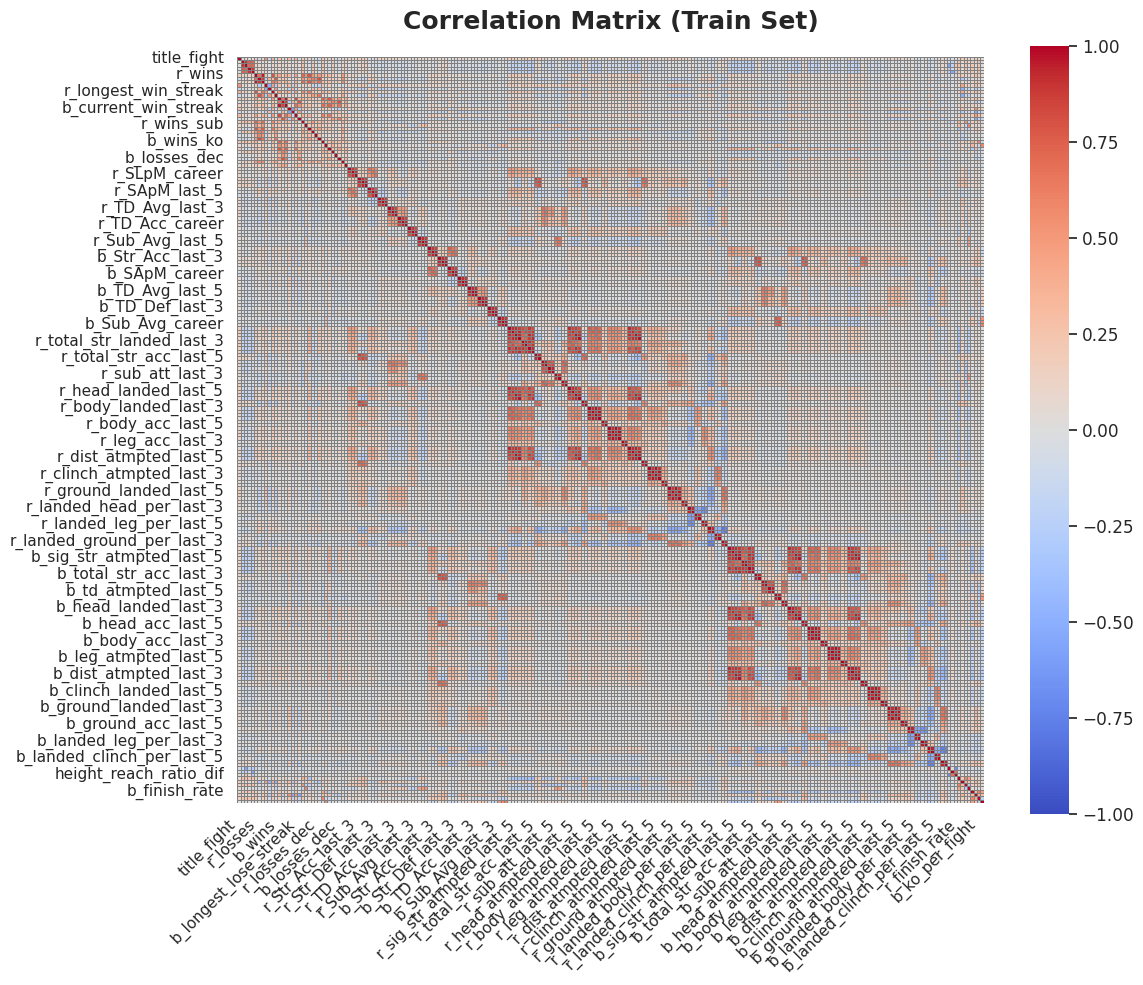

In [15]:
ufc_data.plot_corr(processed = status)

# Inicialize Modeling Data: Standarize Numerical Data & Encode Categorical Data

In [16]:
# ufc_data.standardize()
# ufc_data.encode()

# Check Modeling Data

[INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


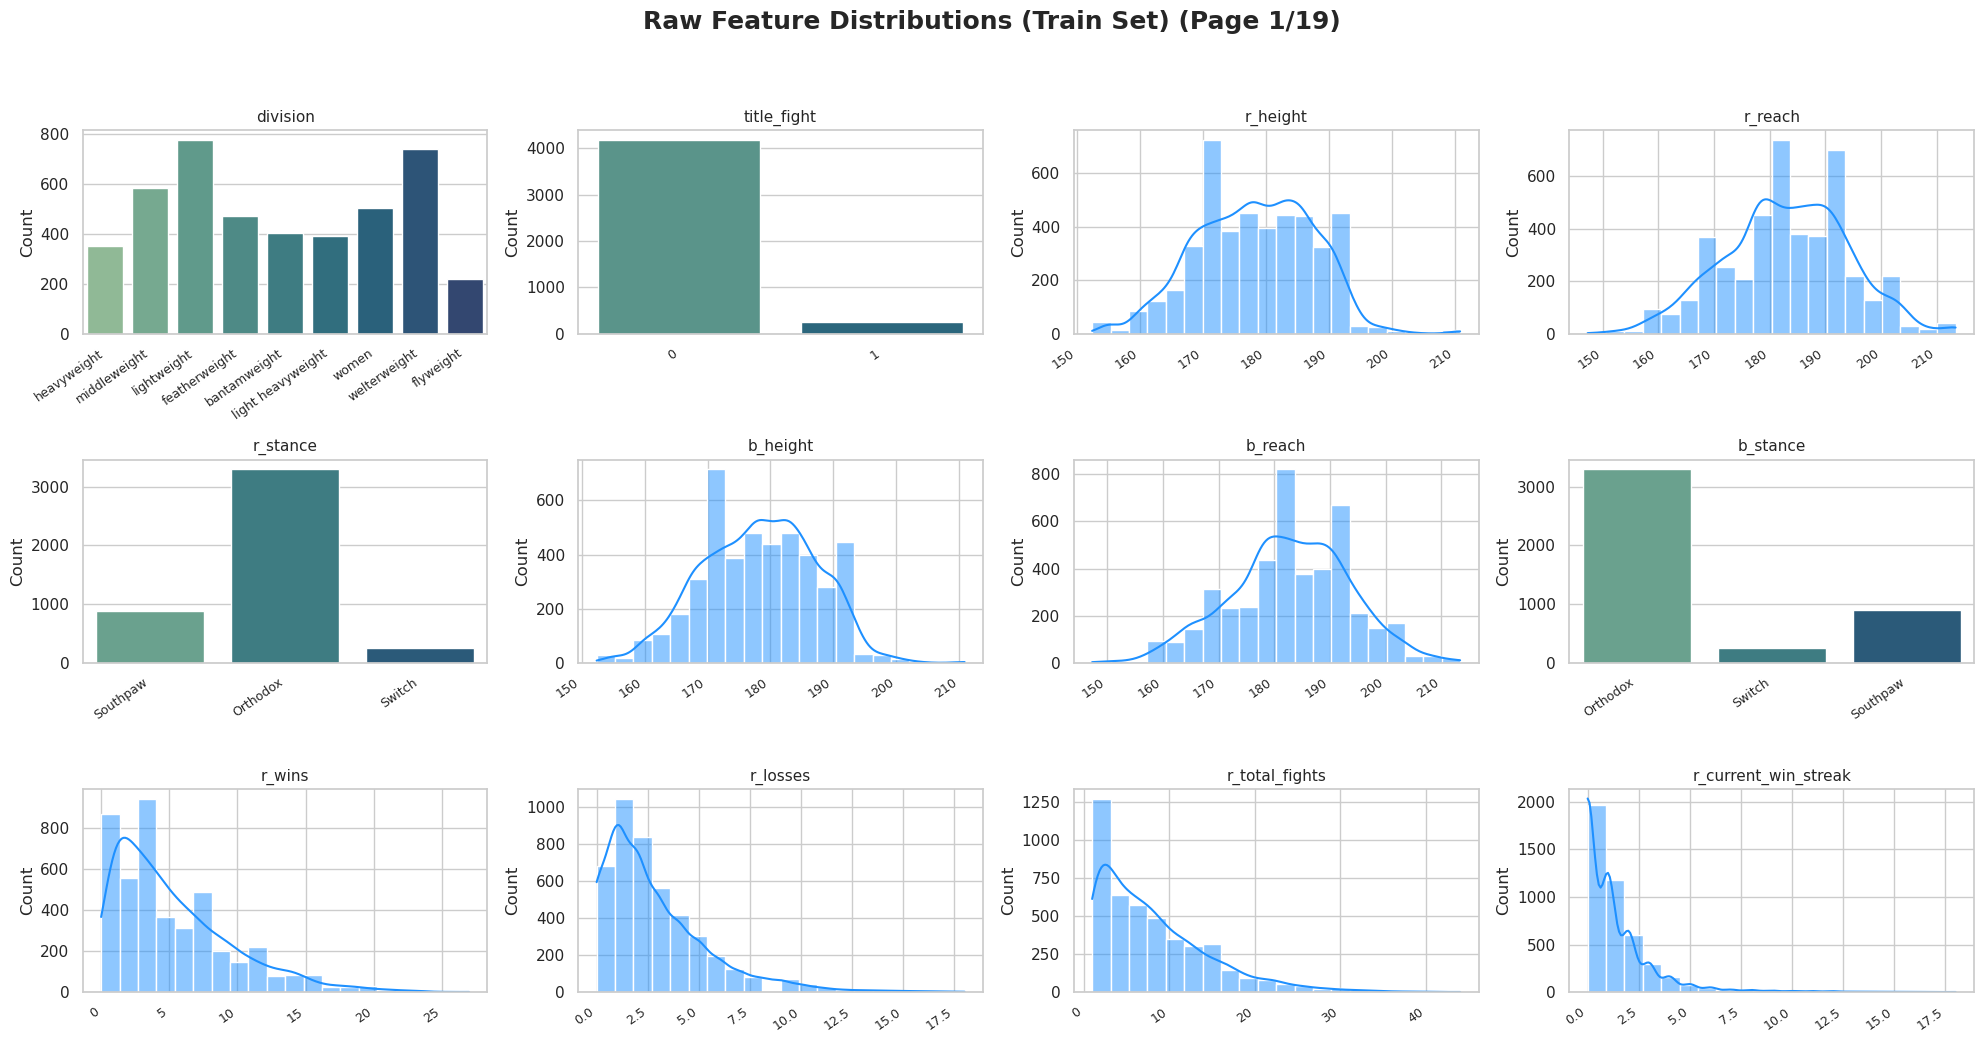

[INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[INFO] Using ca

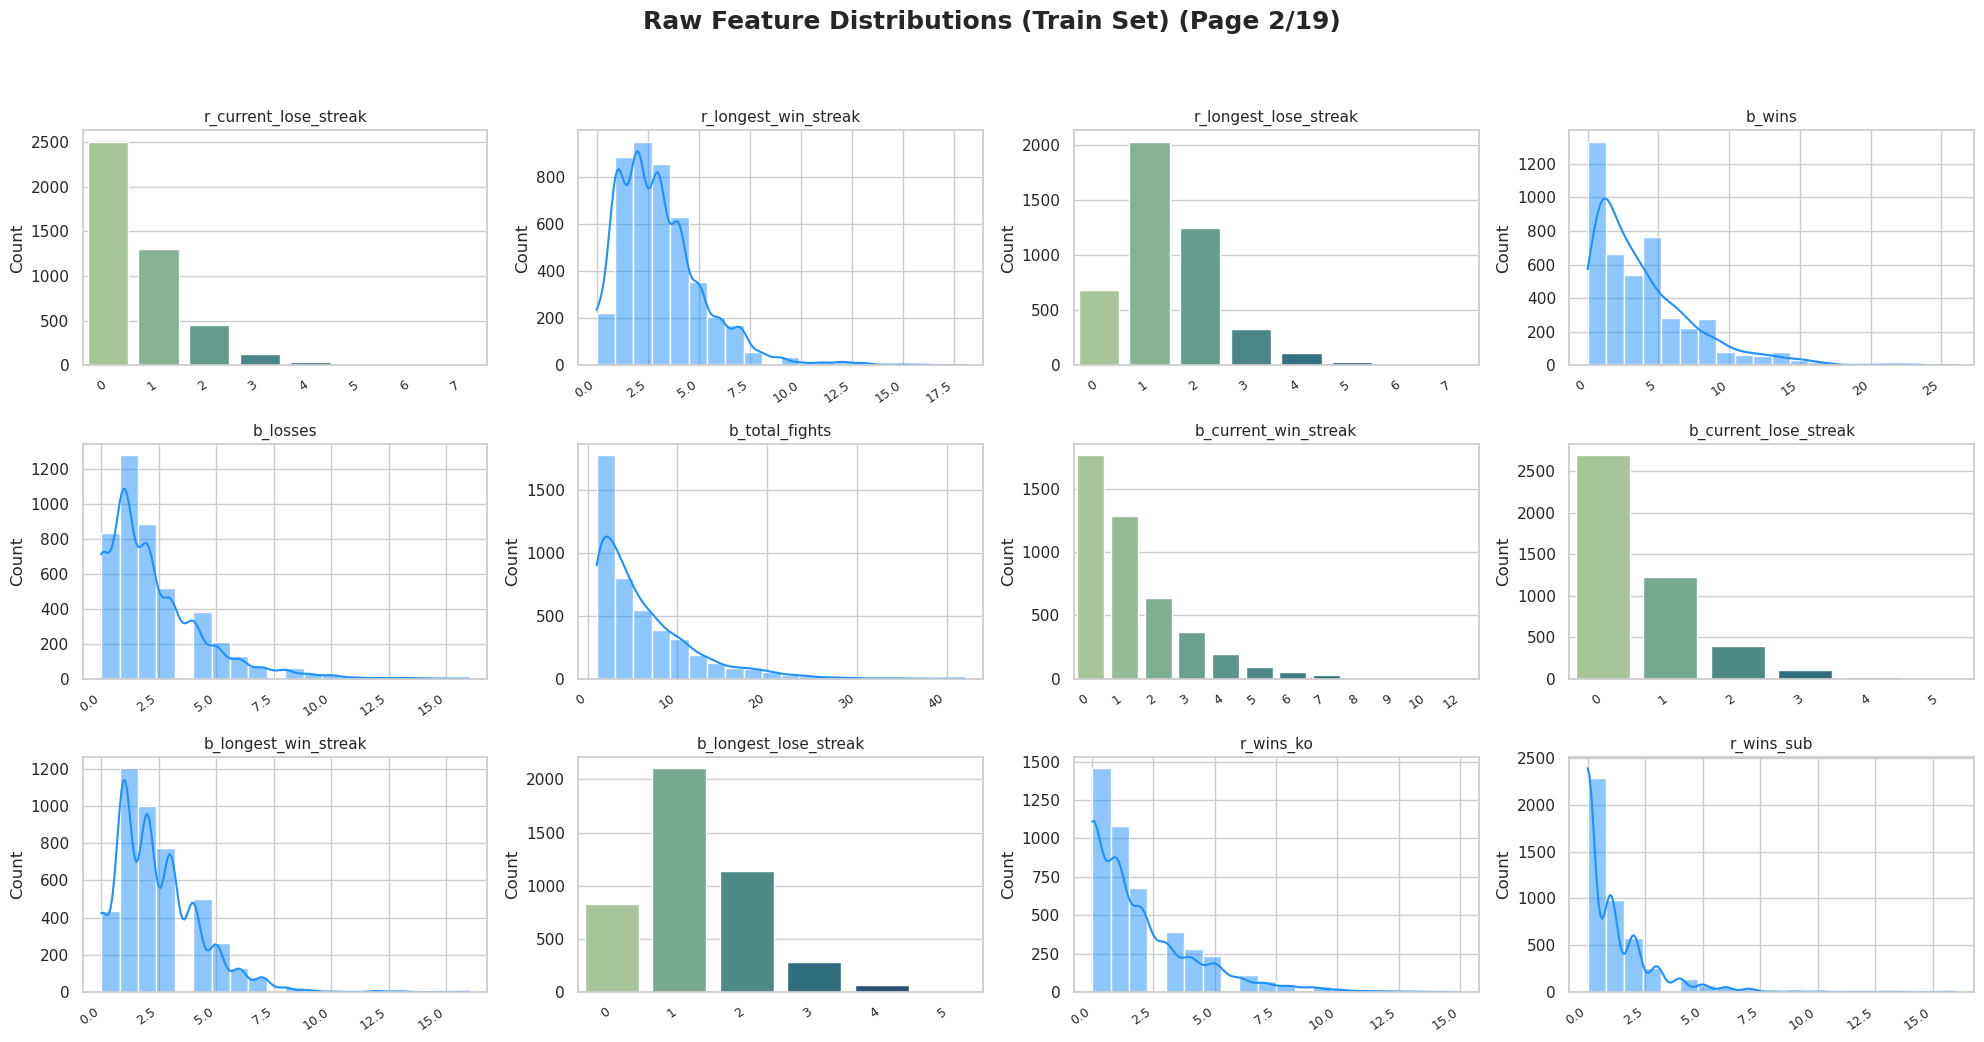

[INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[INFO] Using ca

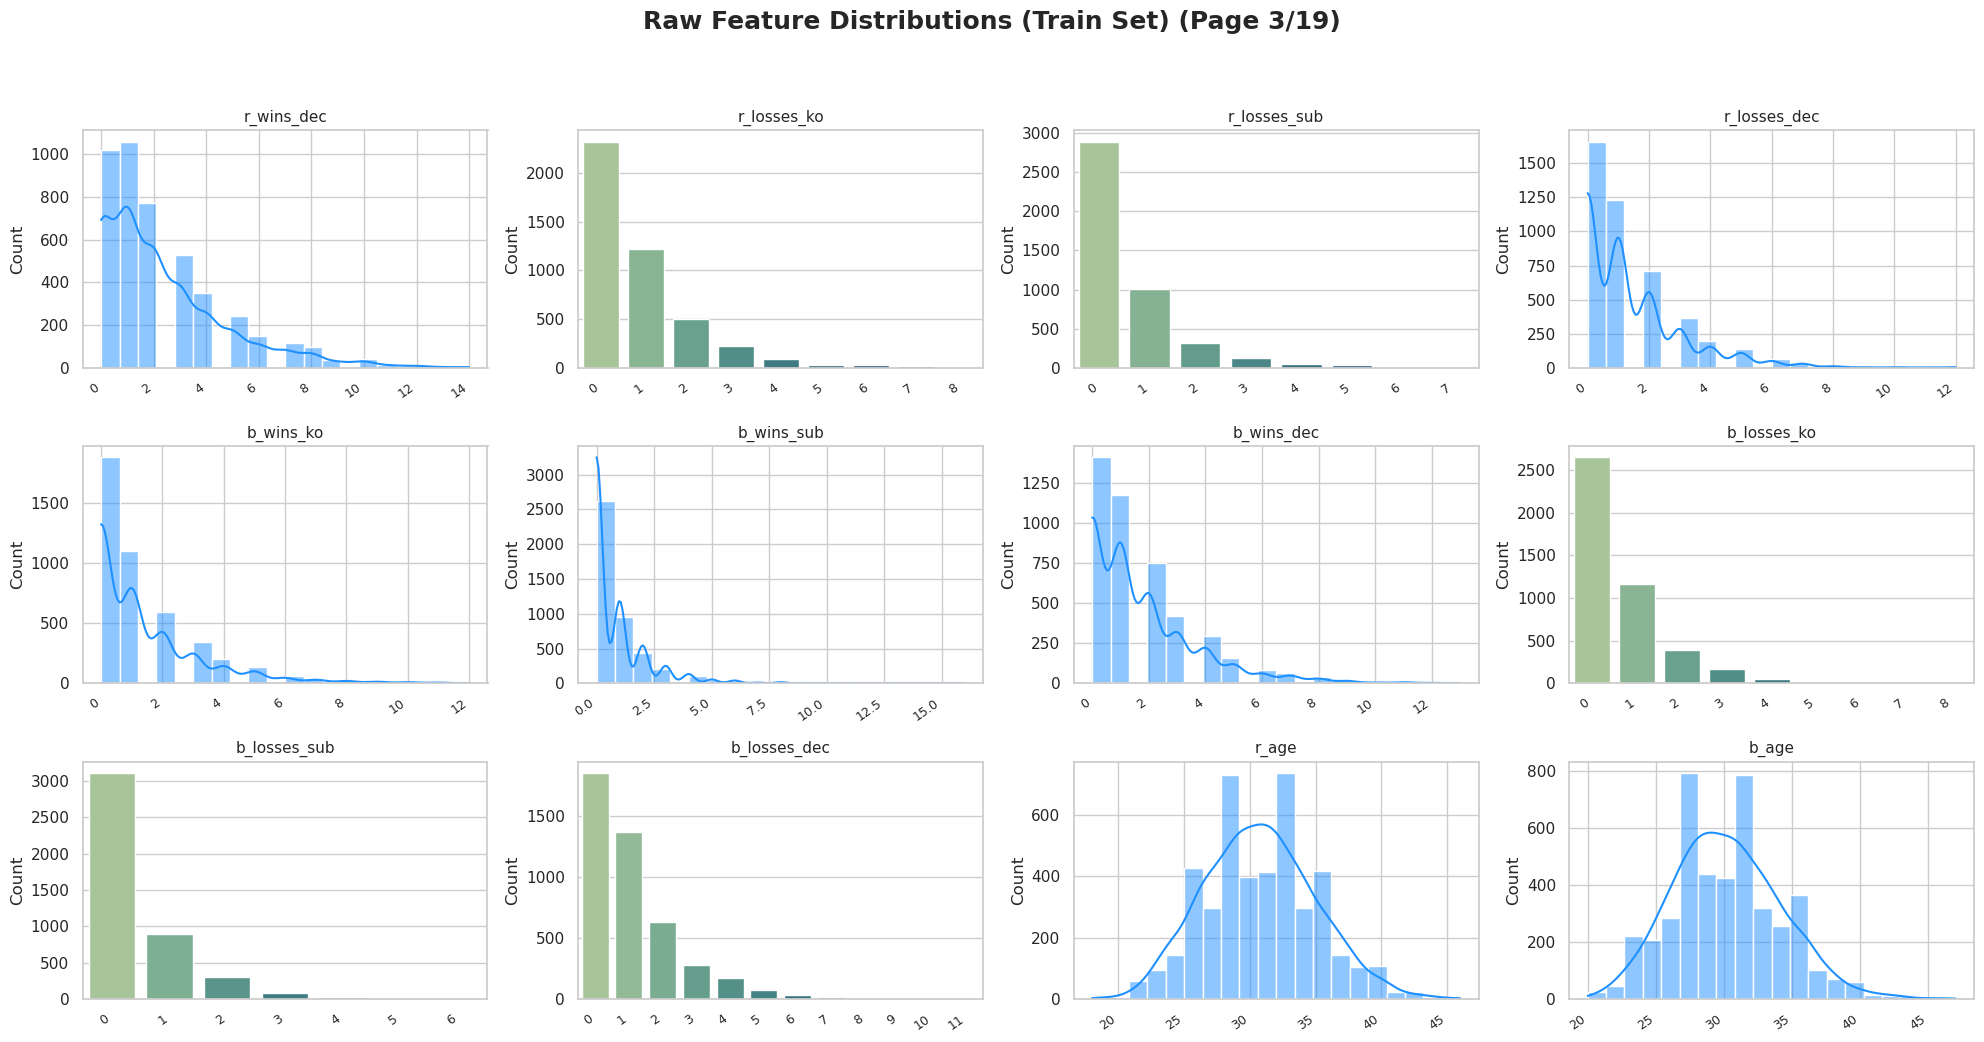

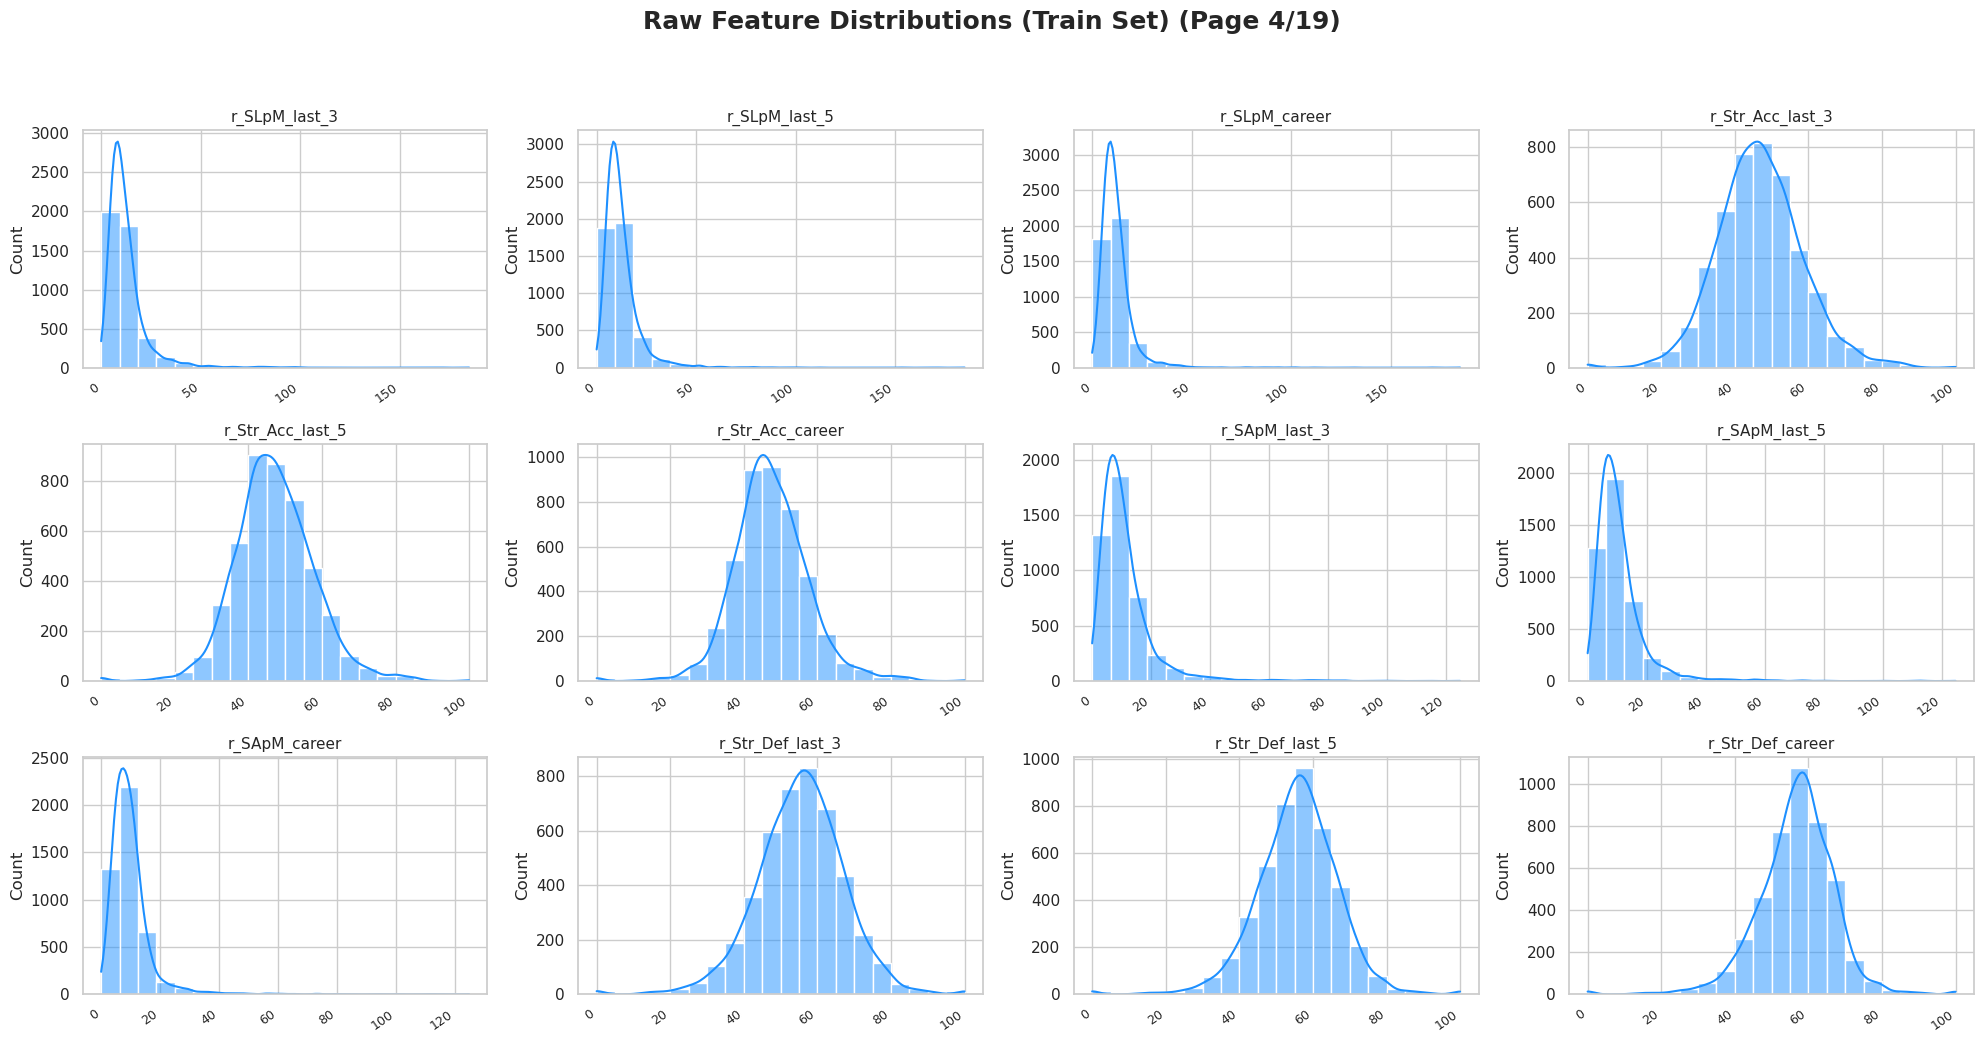

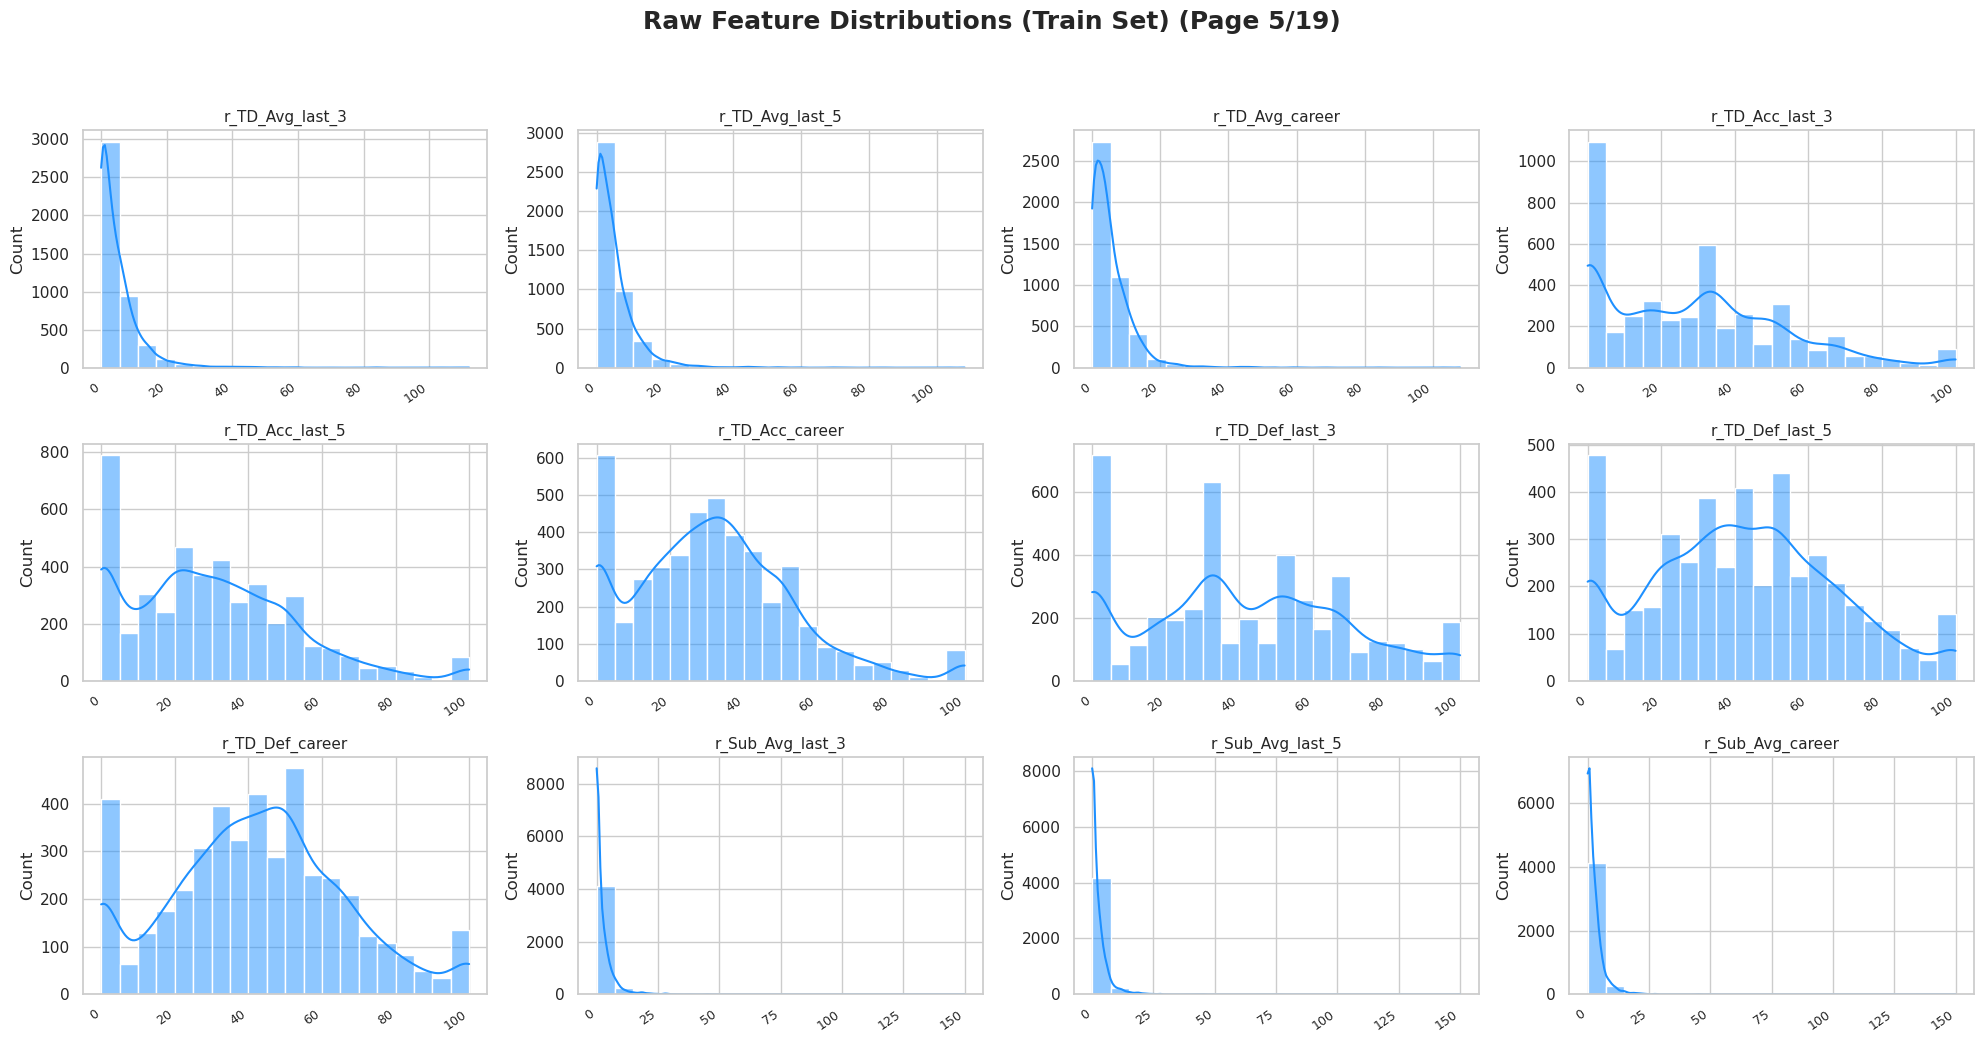

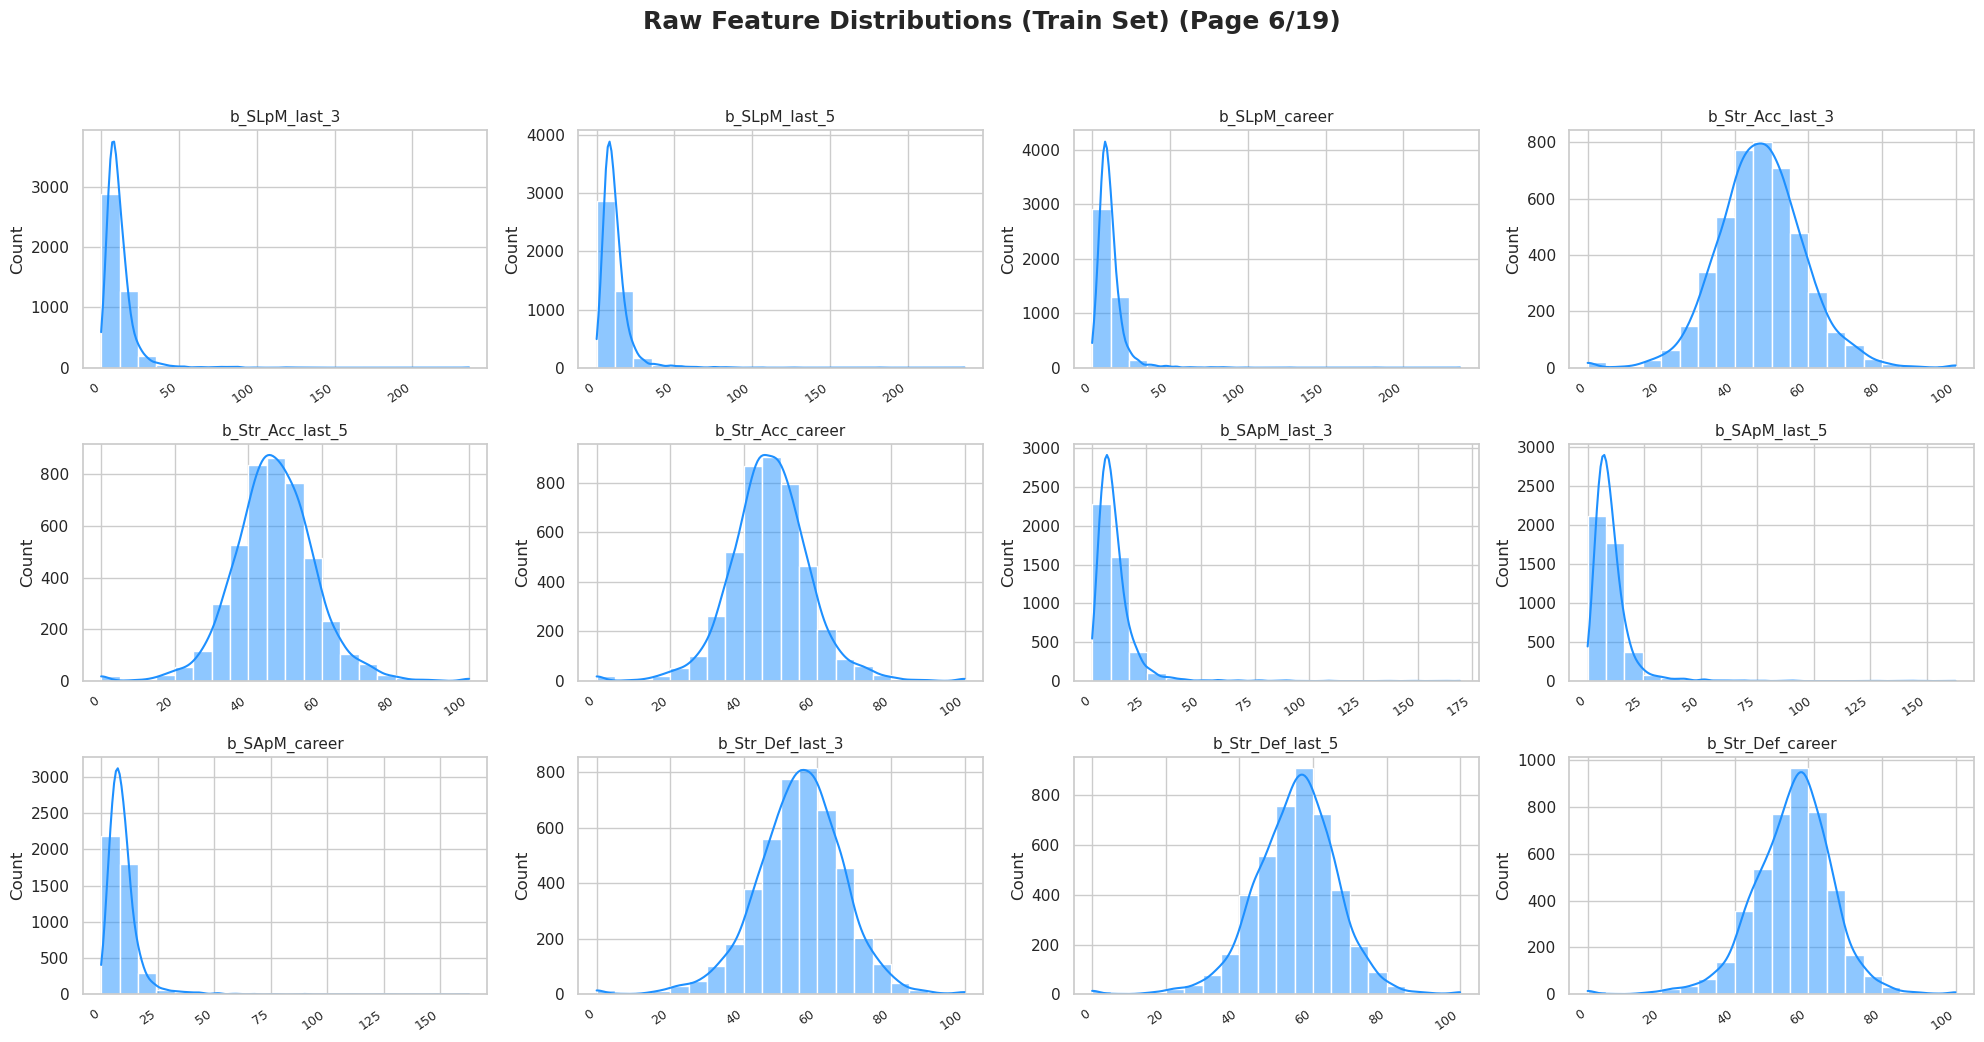

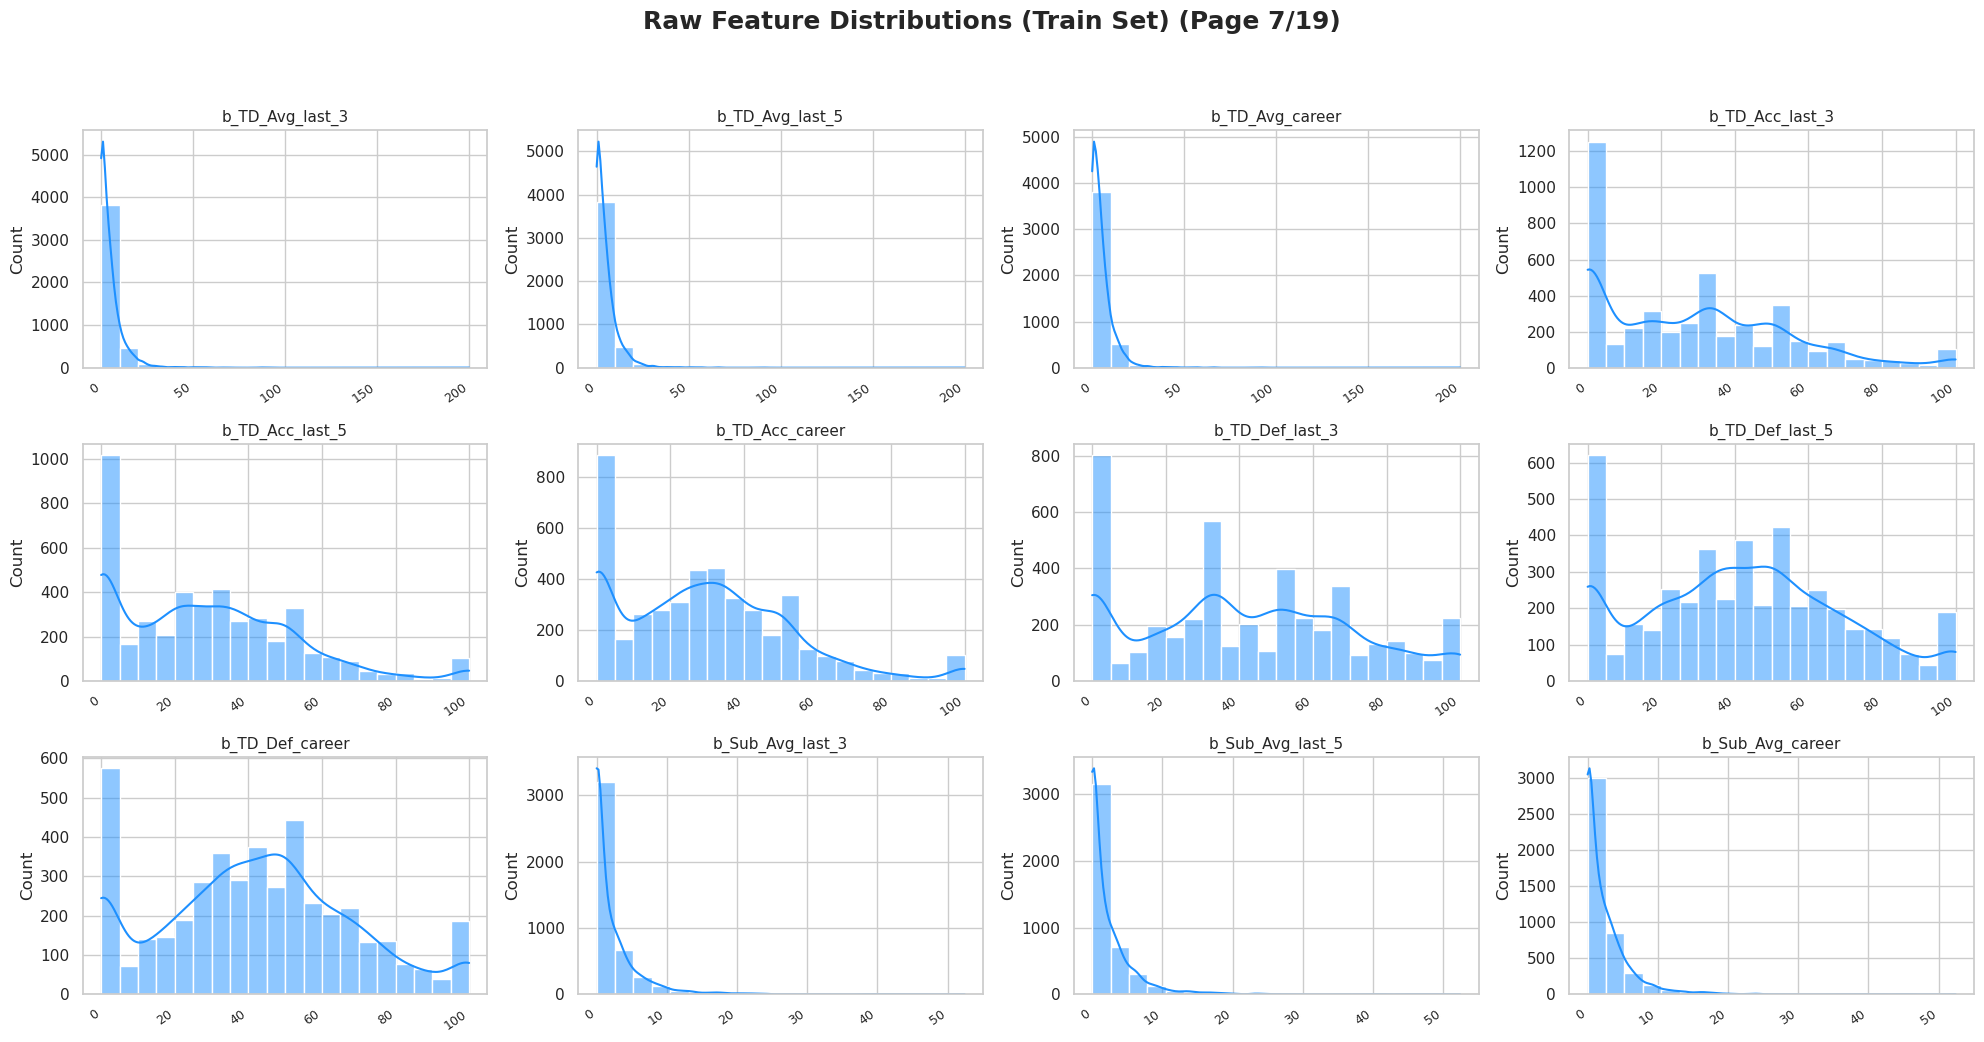

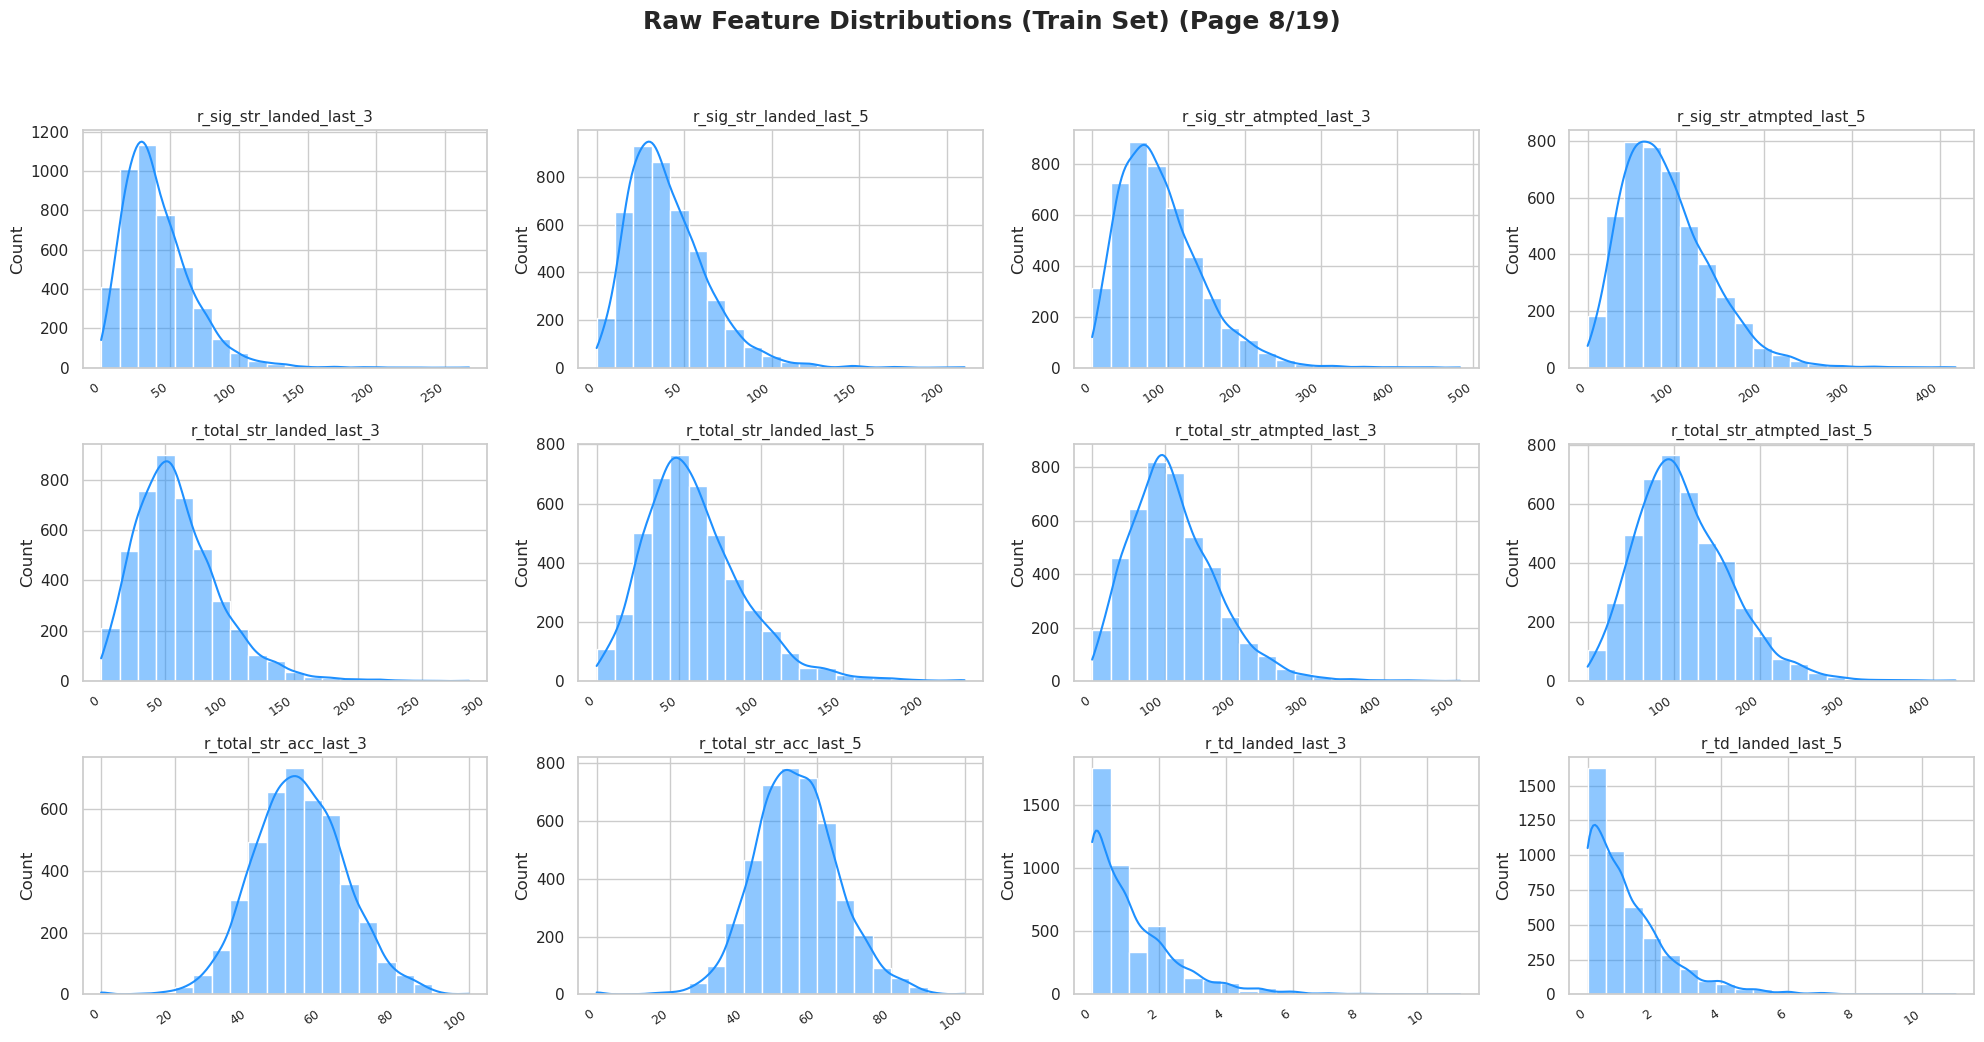

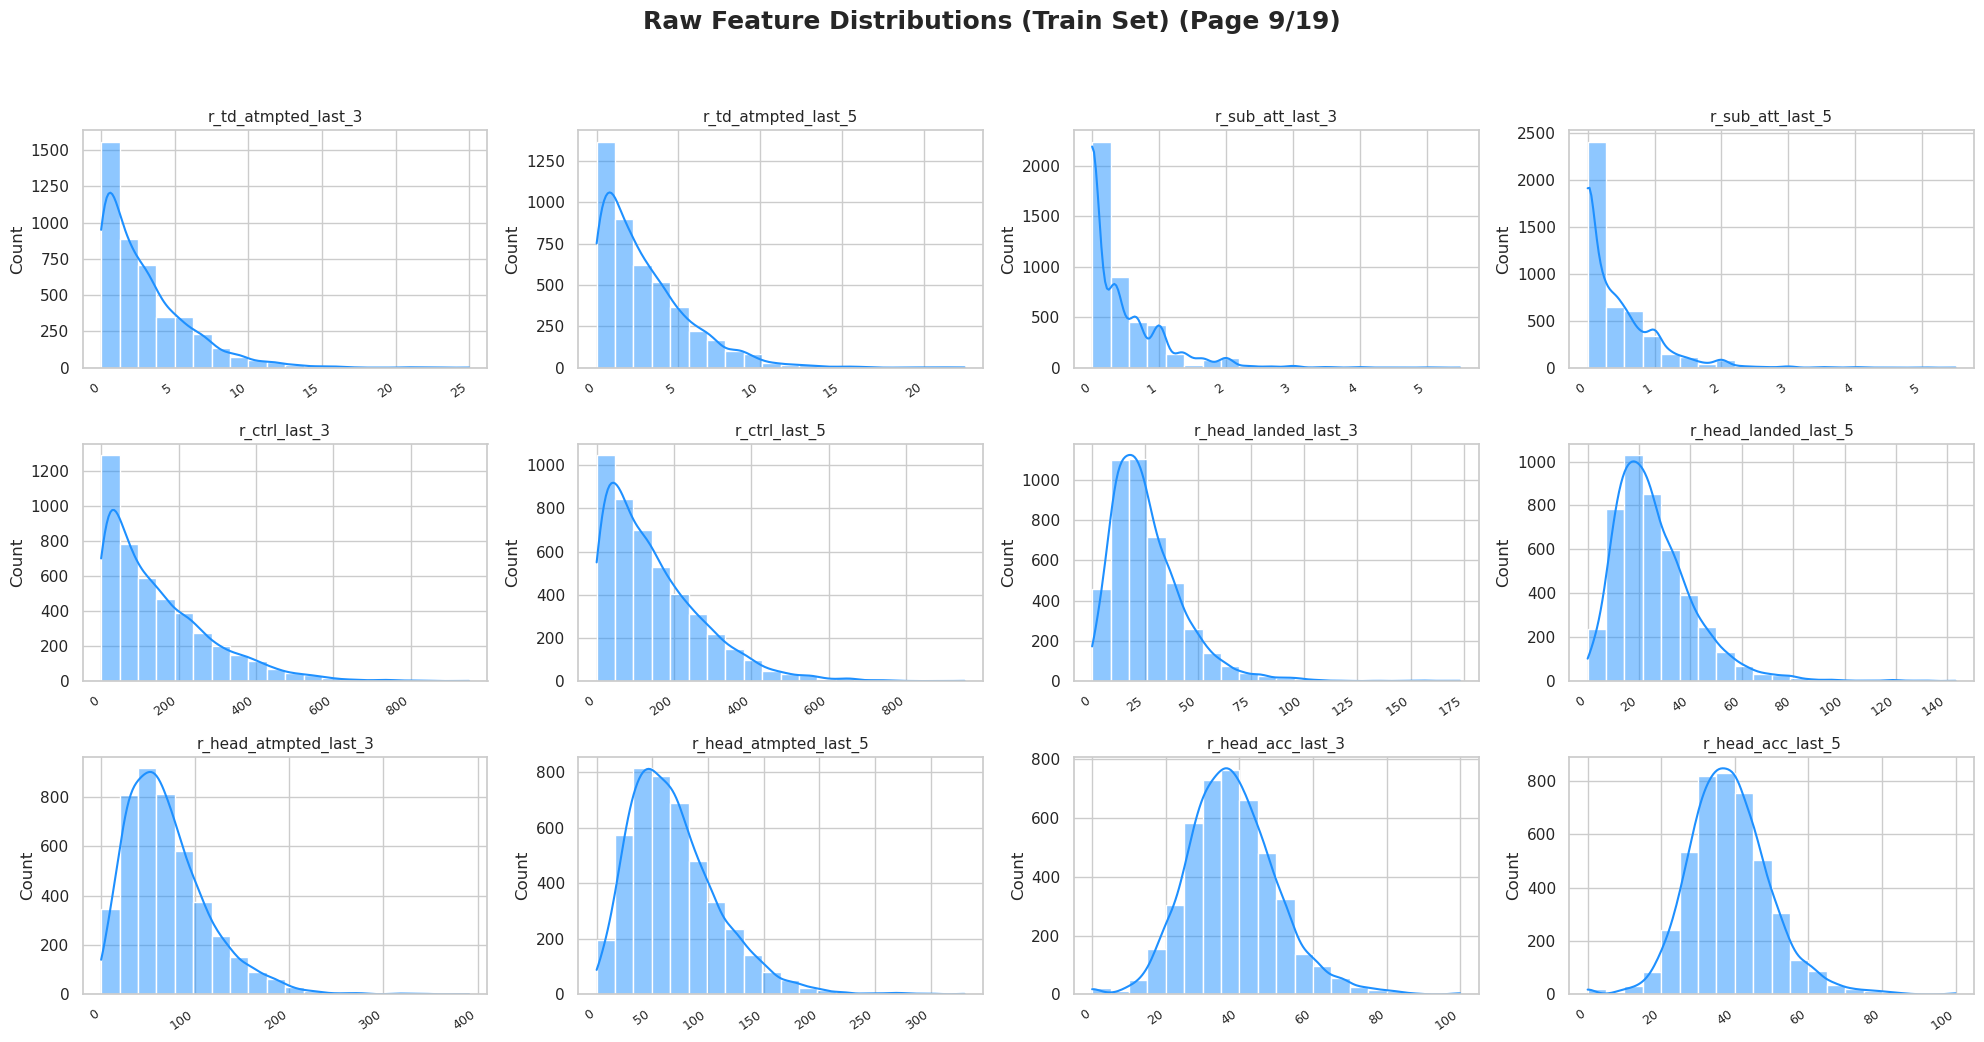

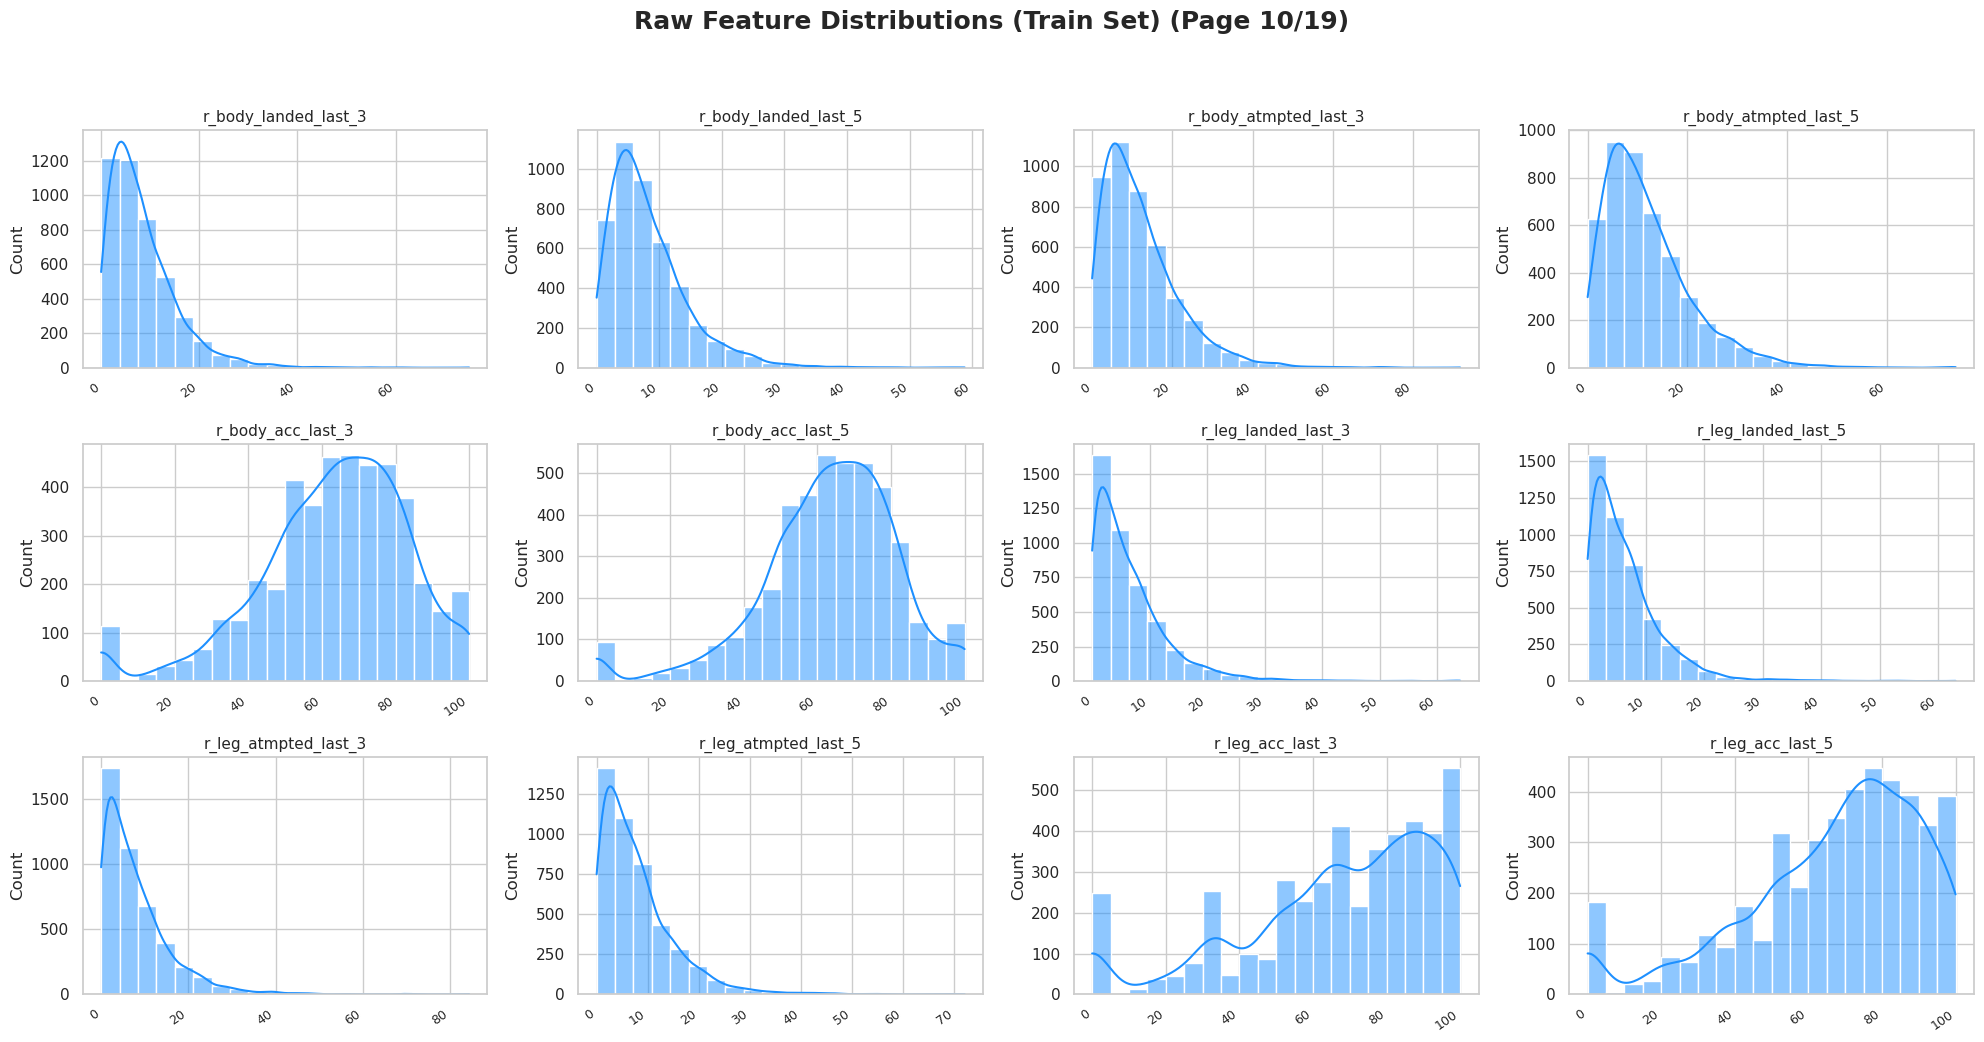

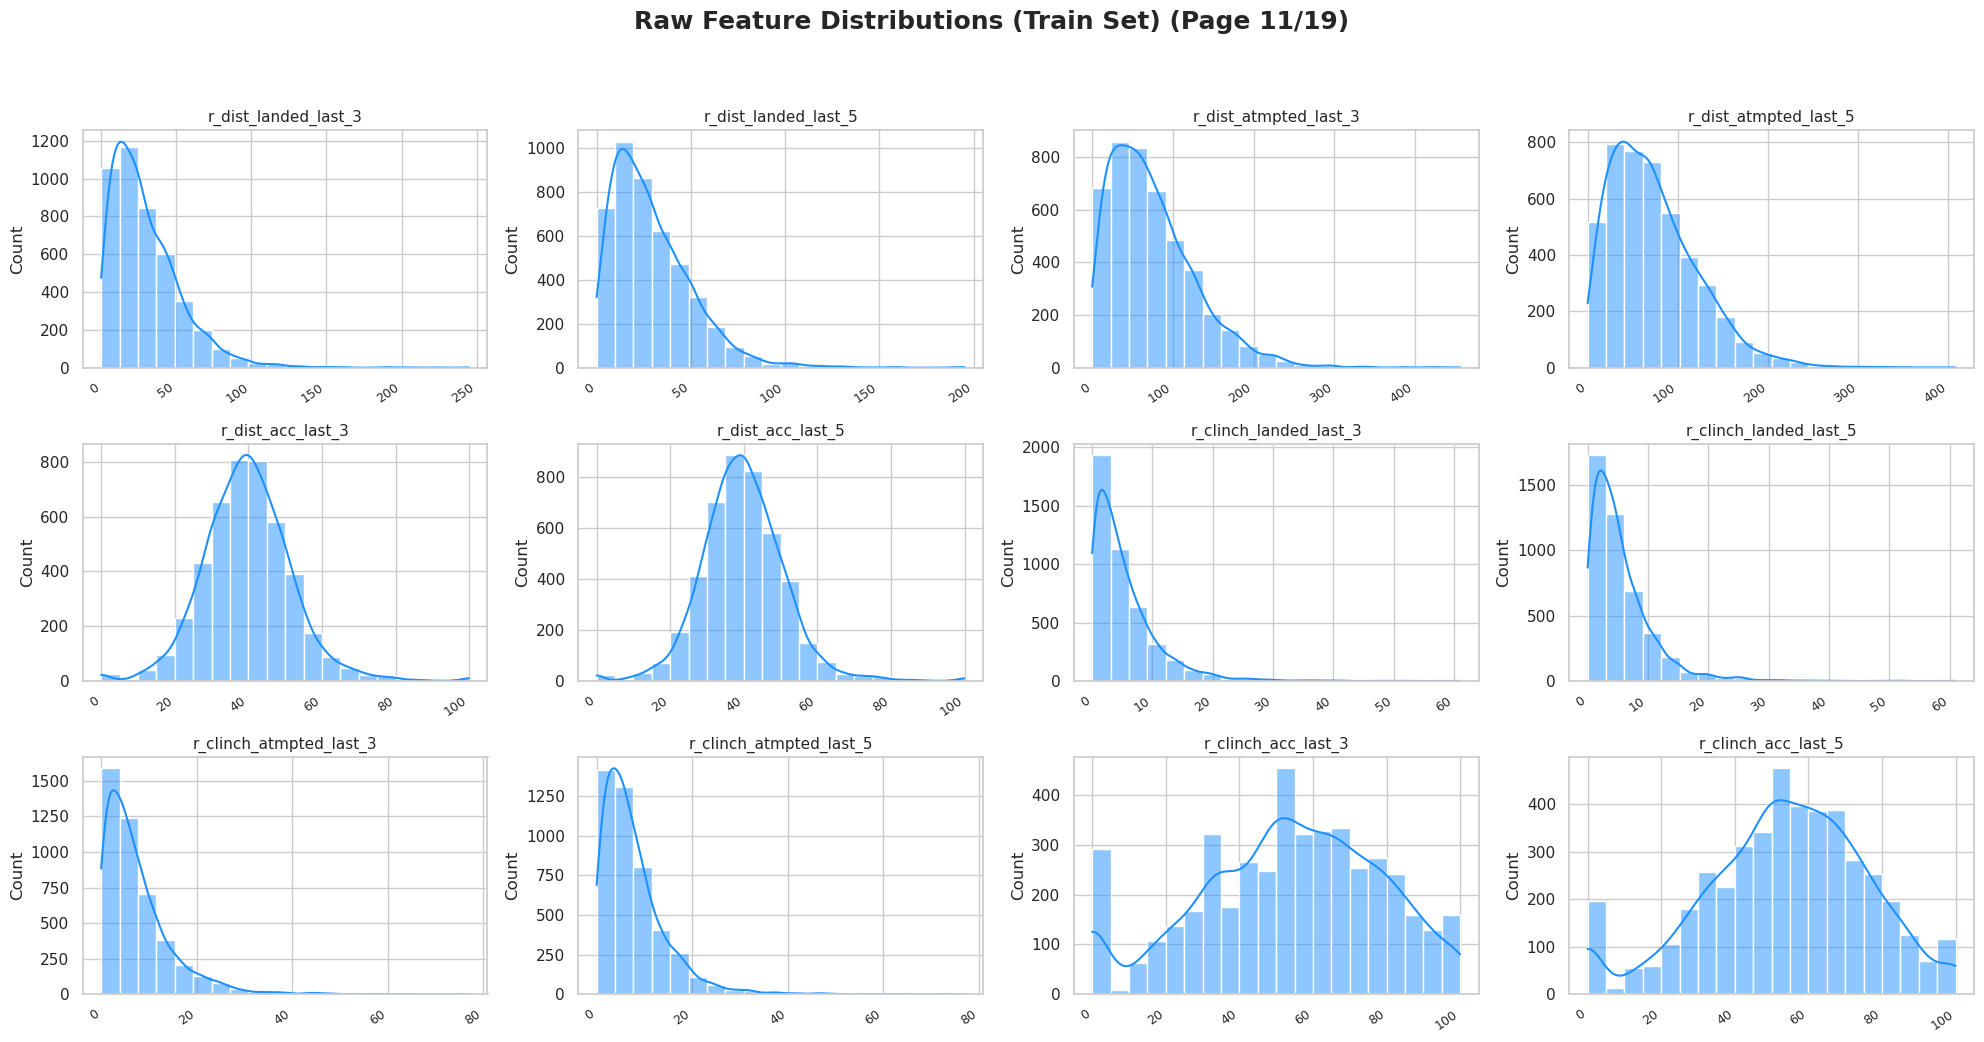

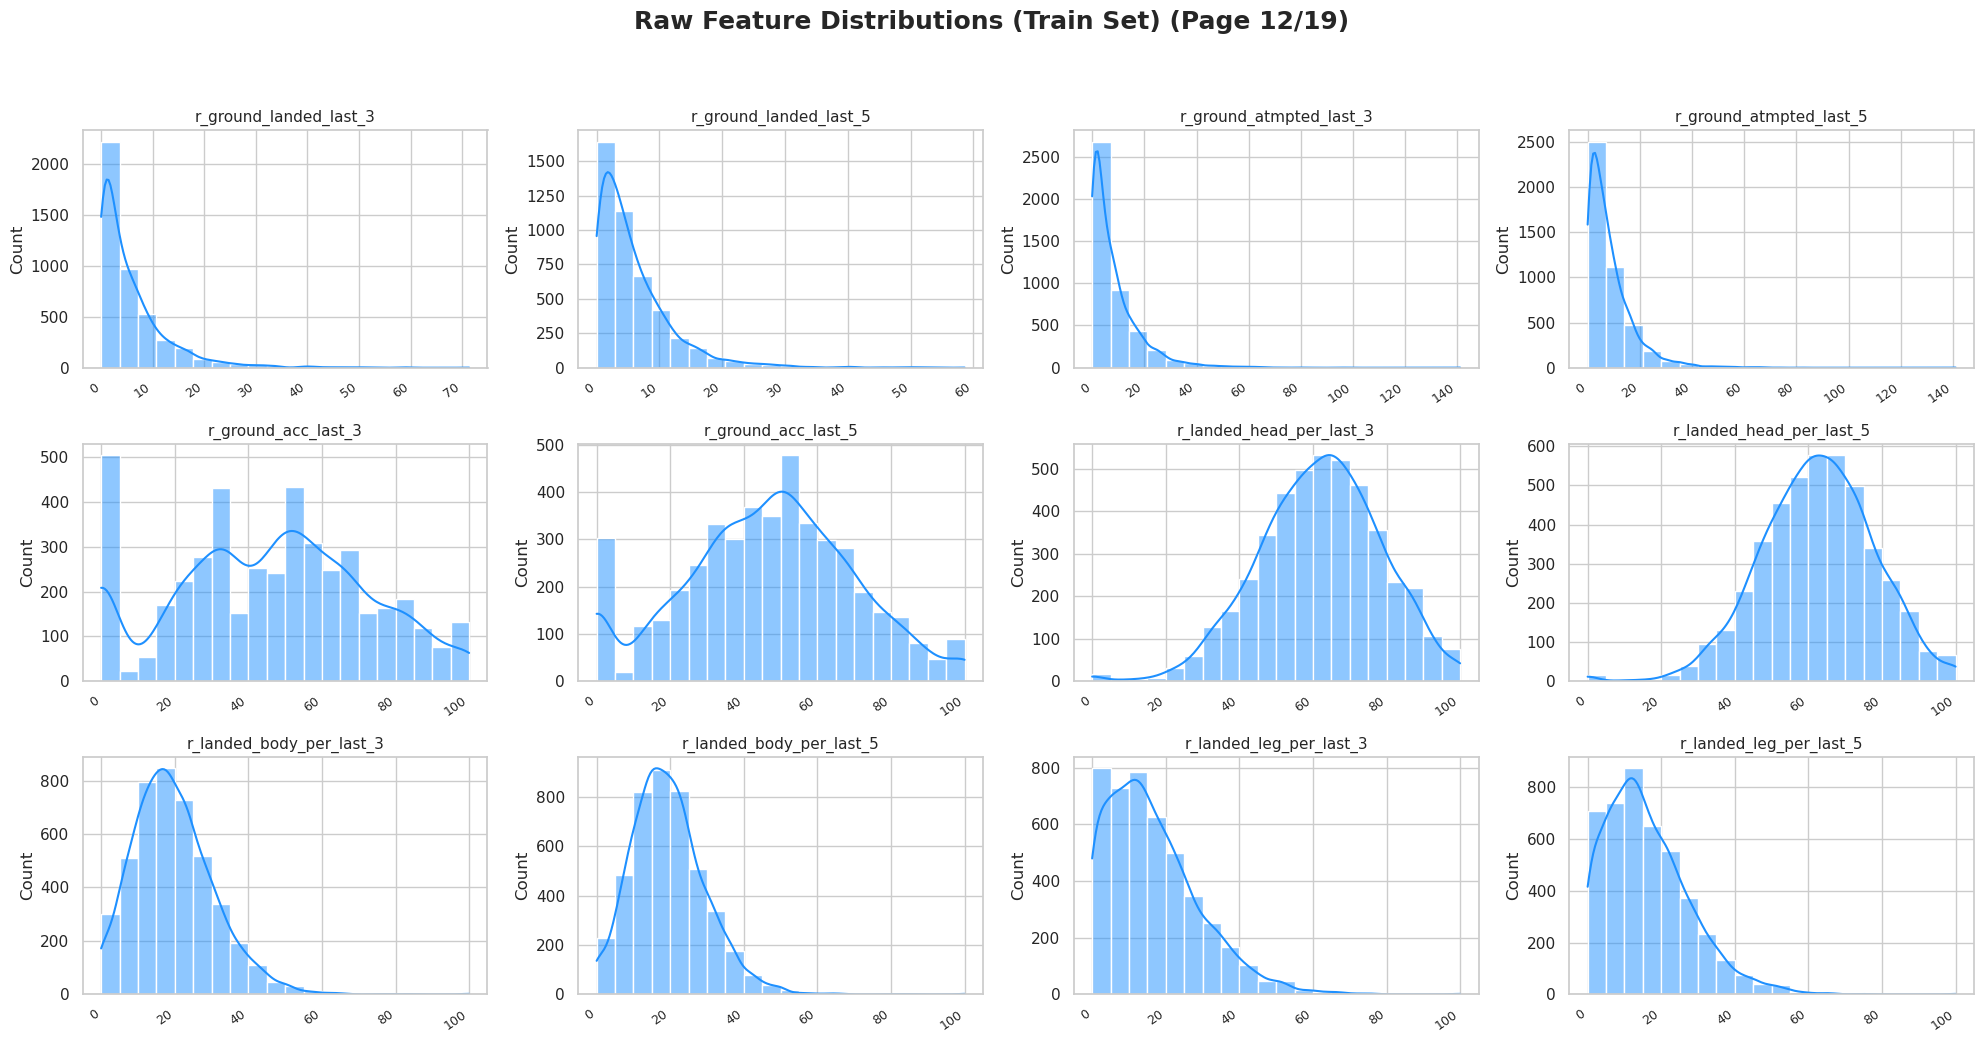

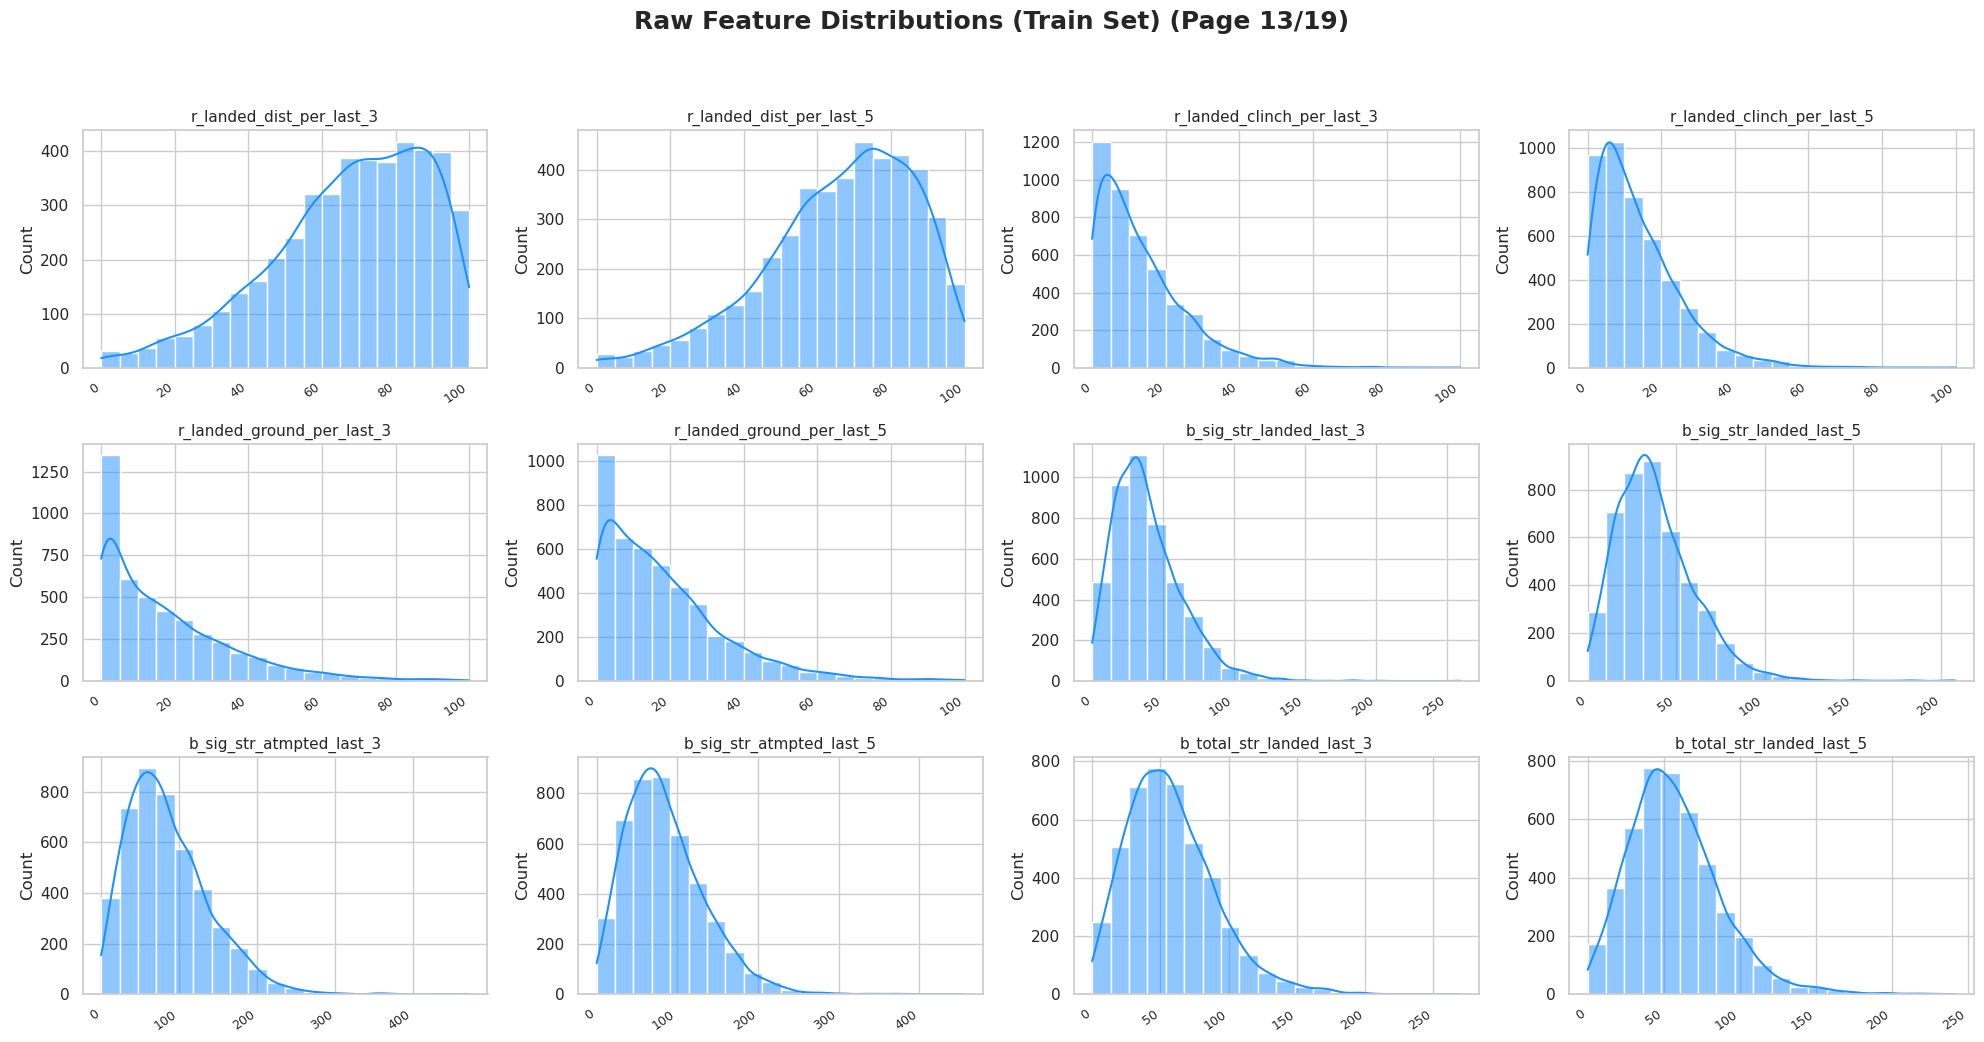

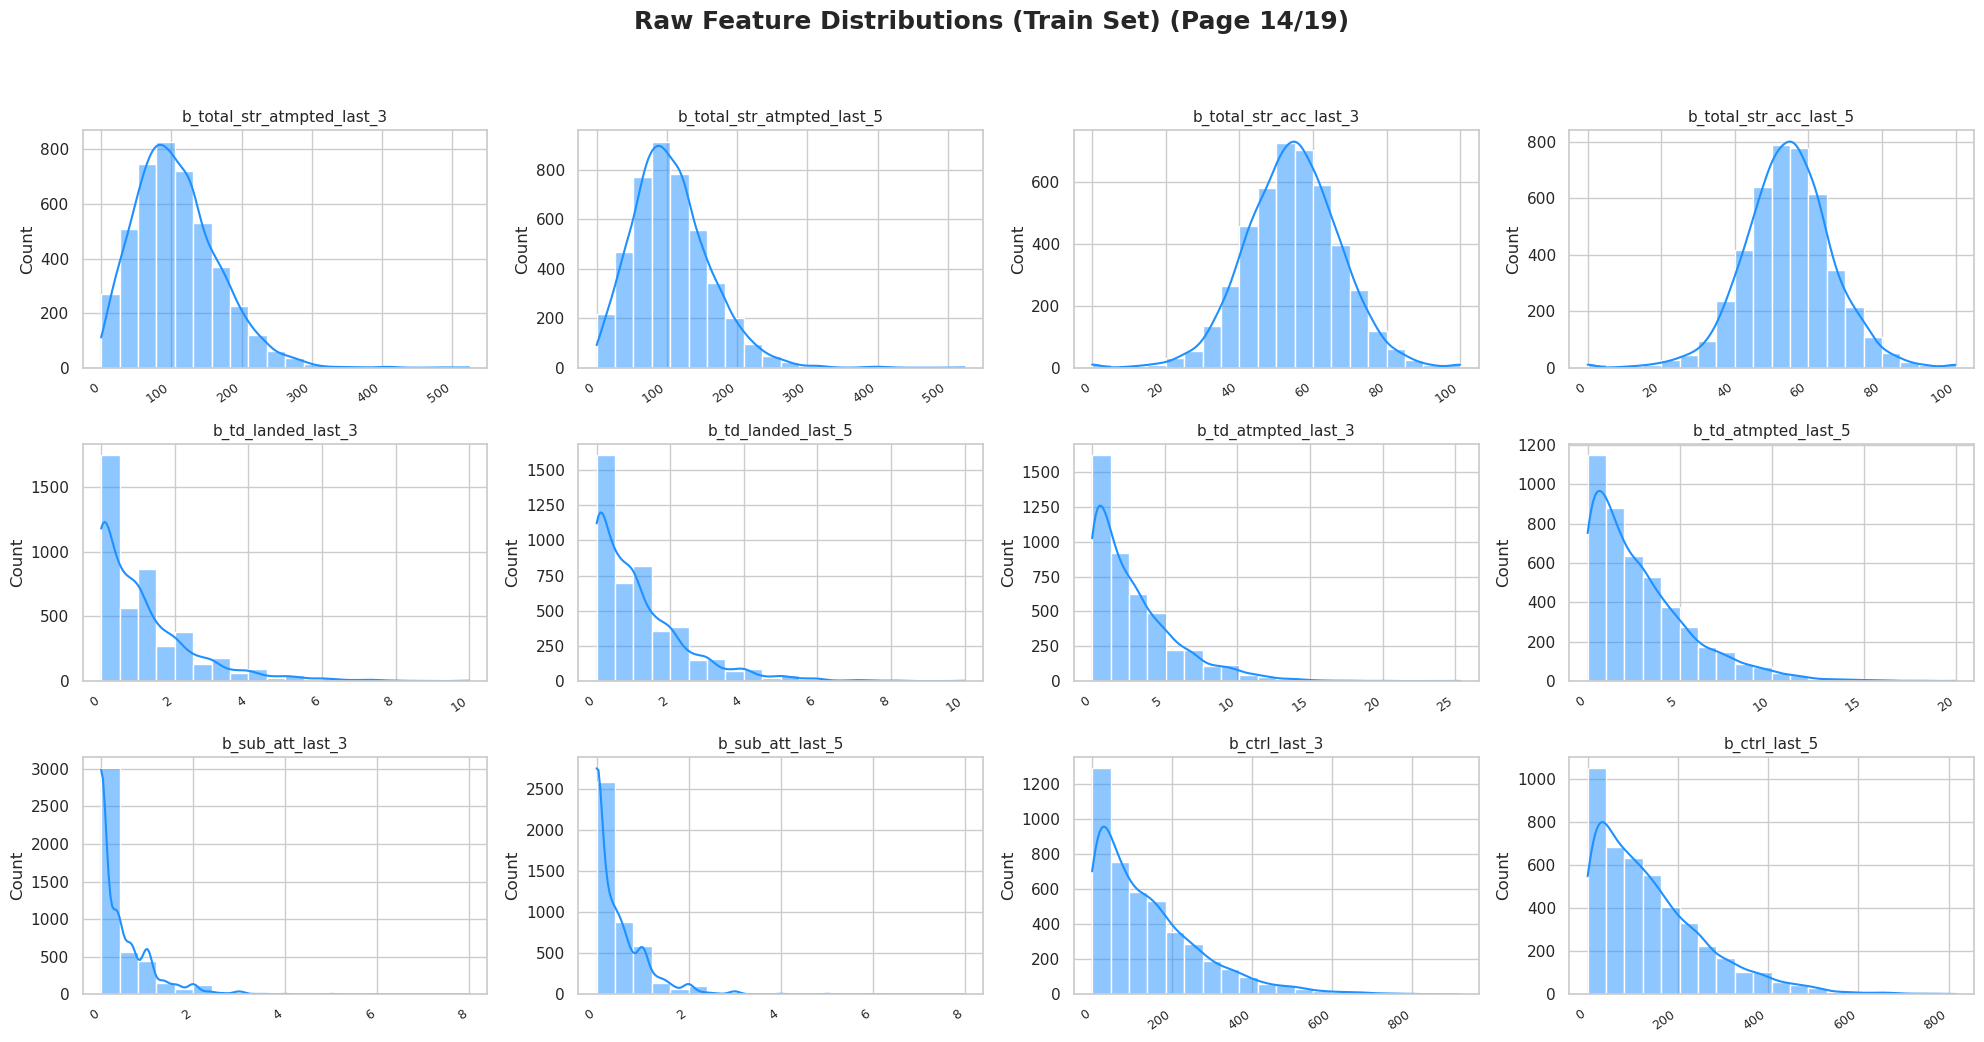

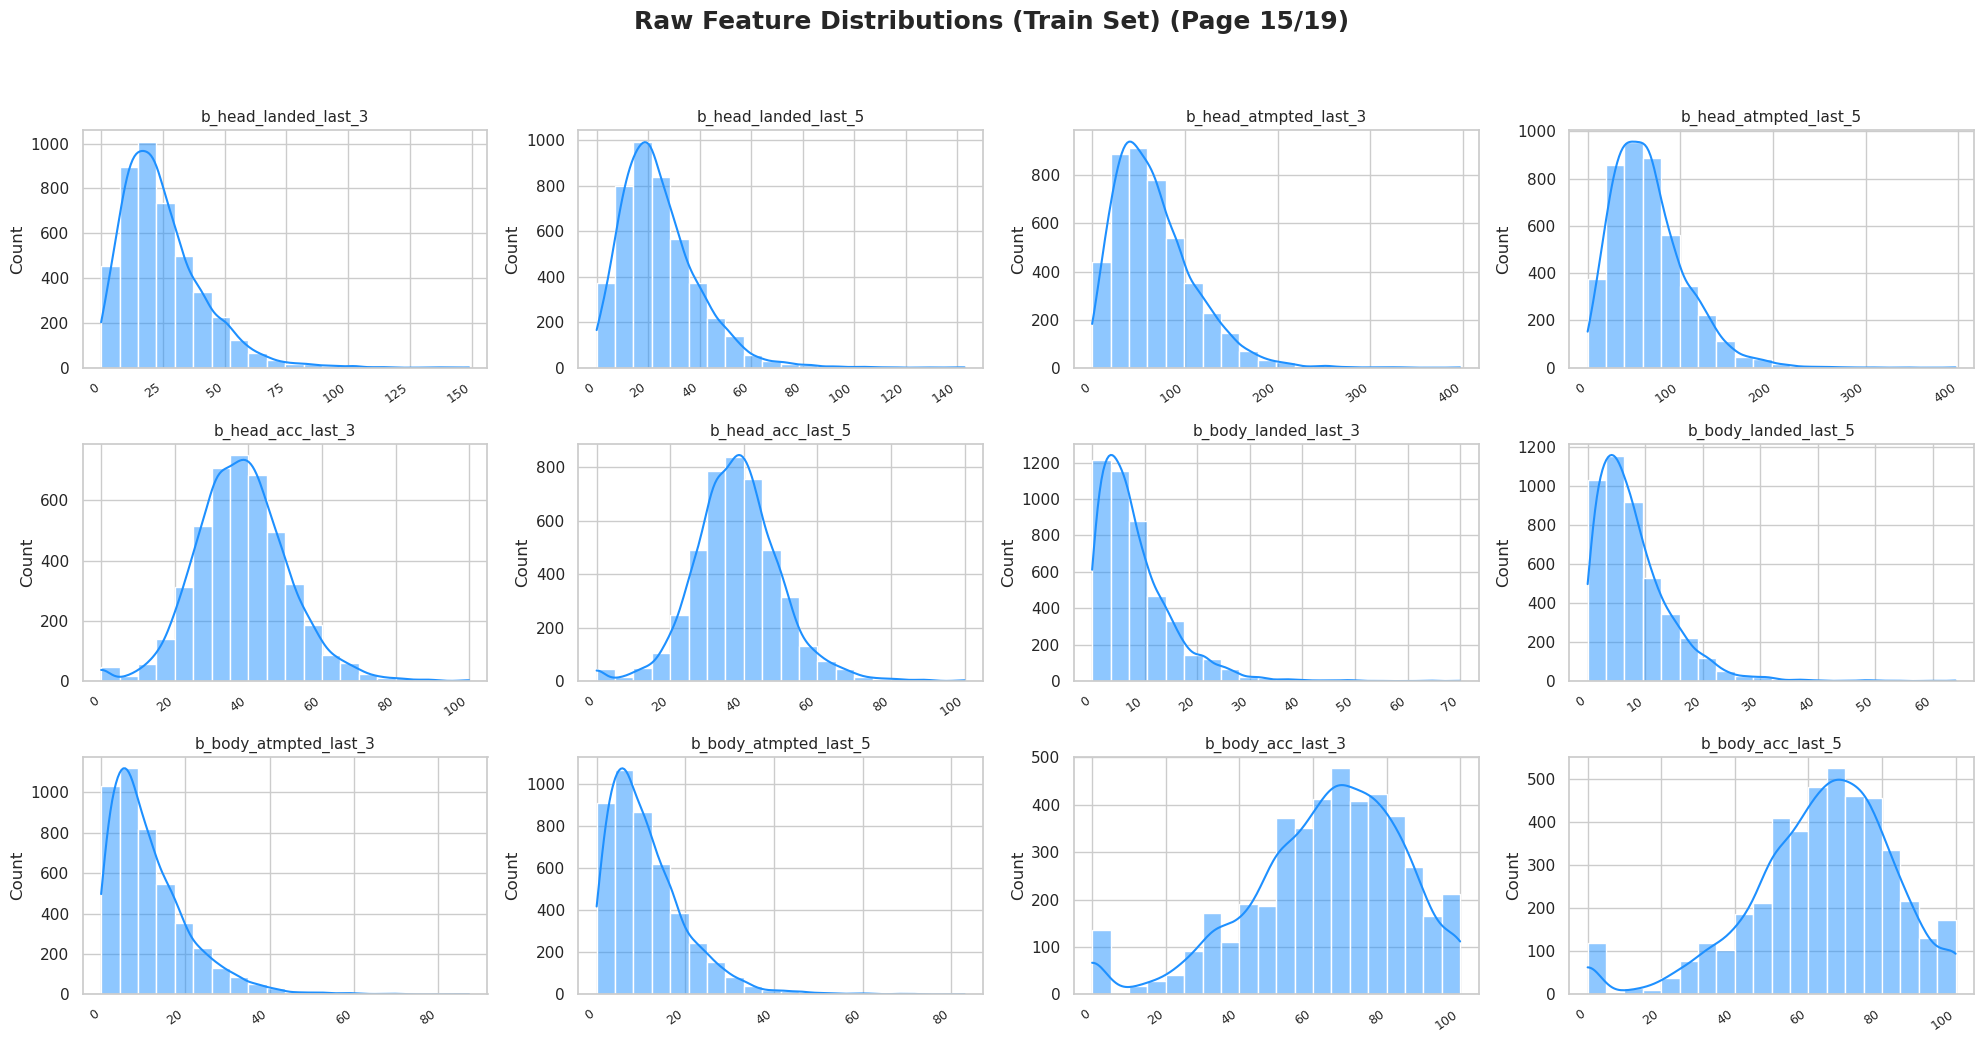

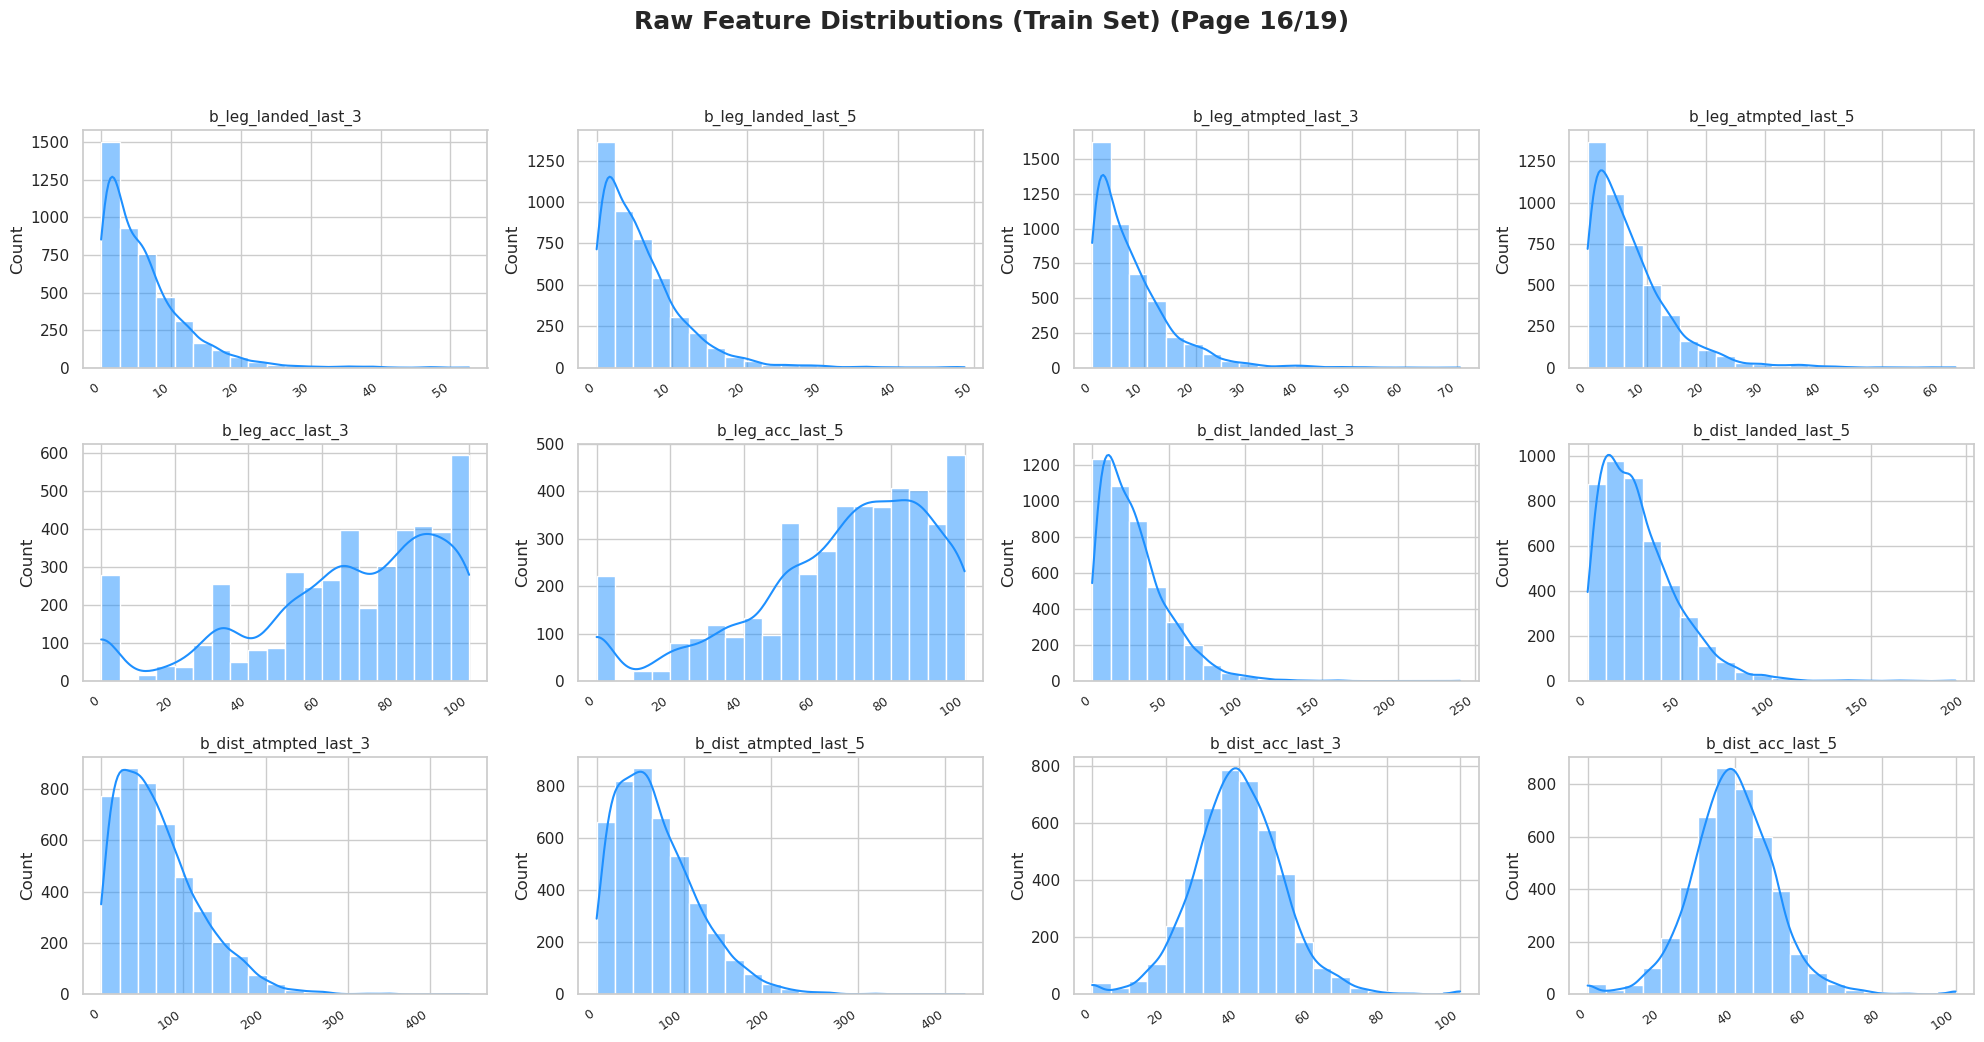

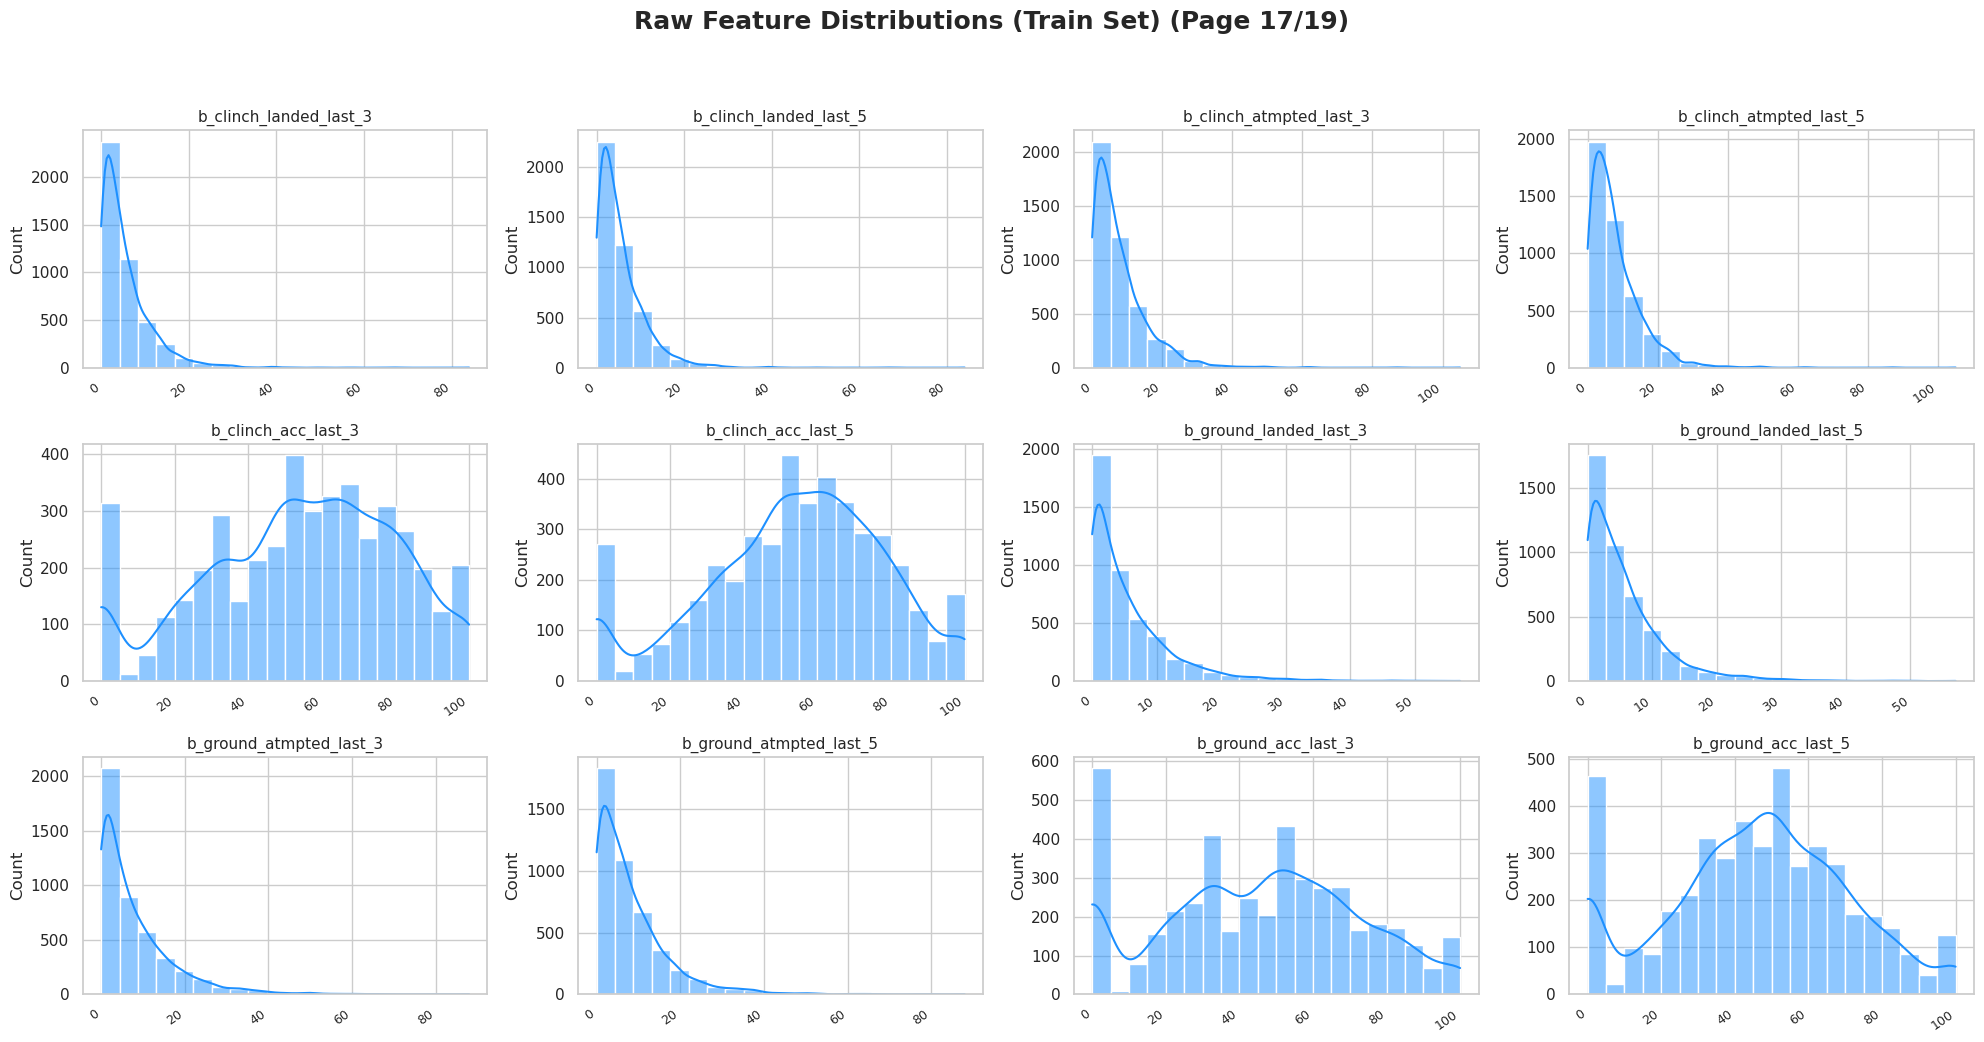

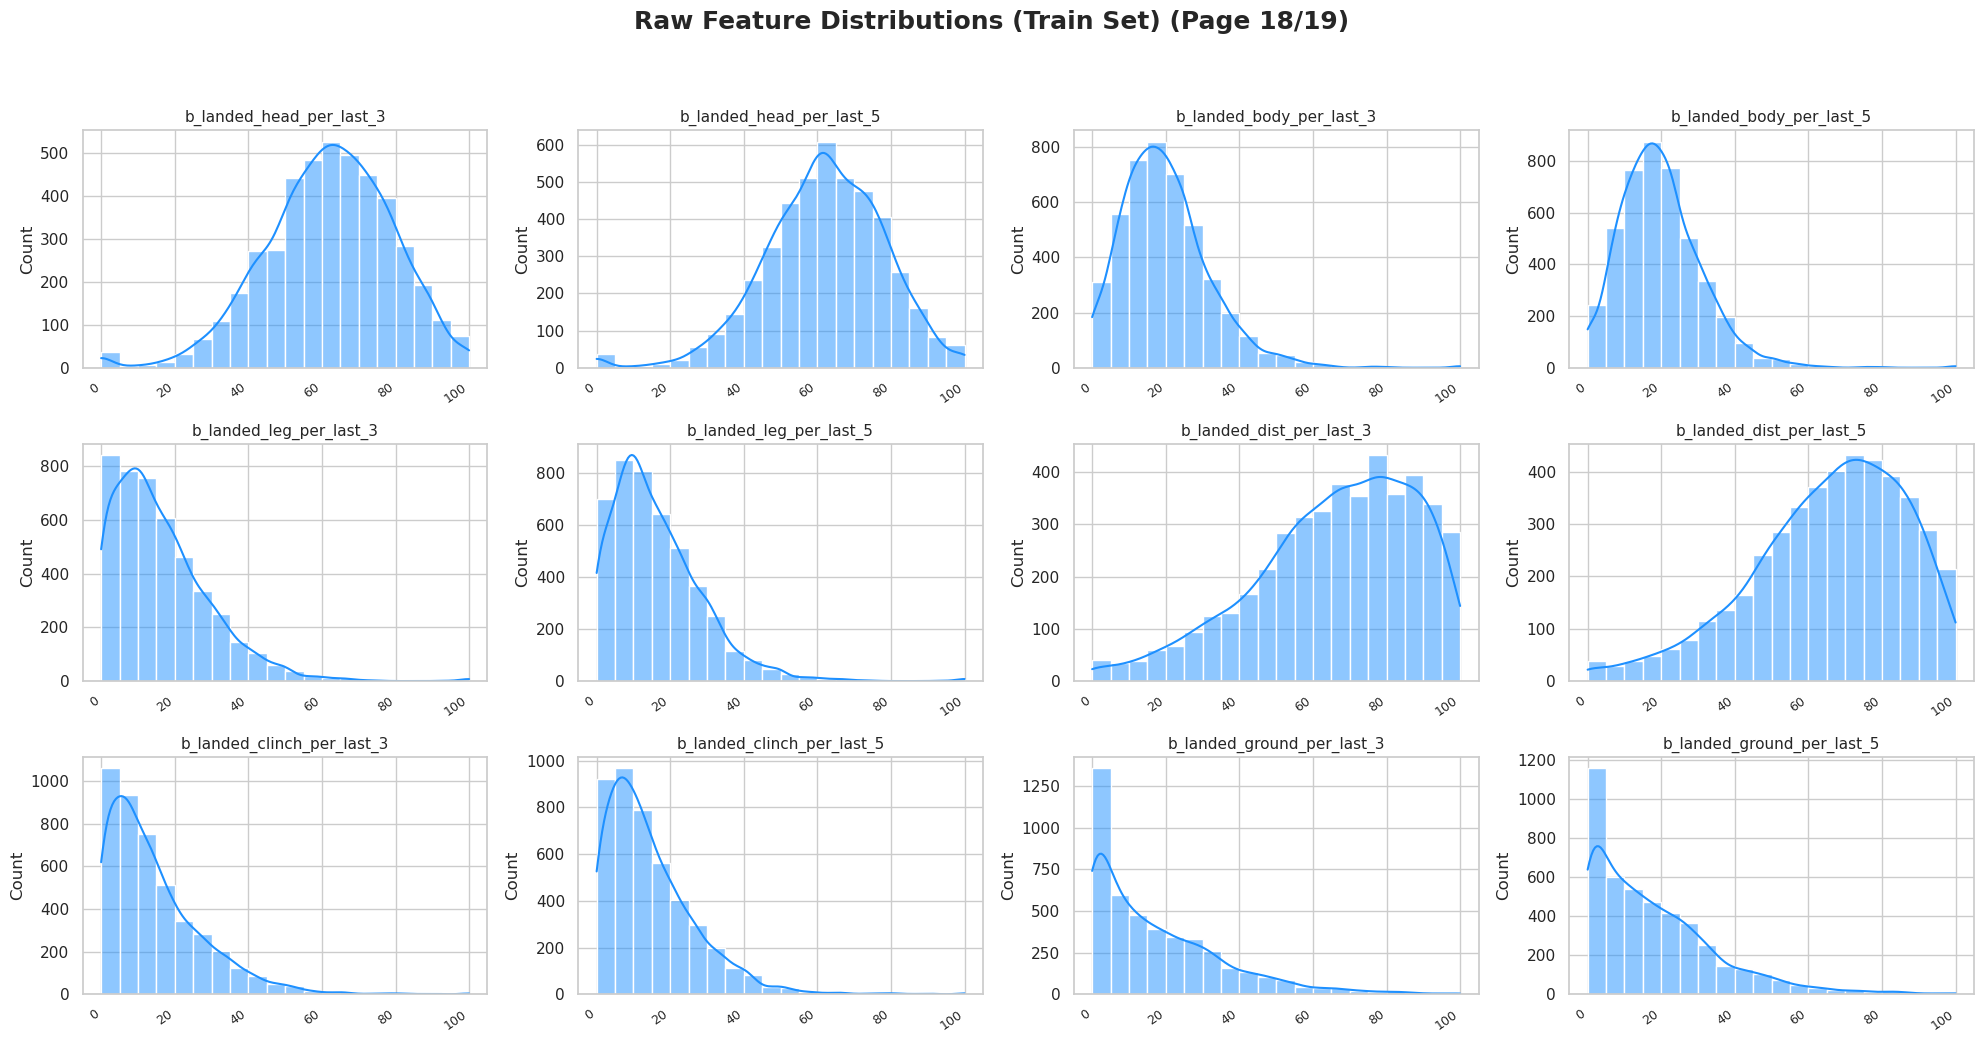

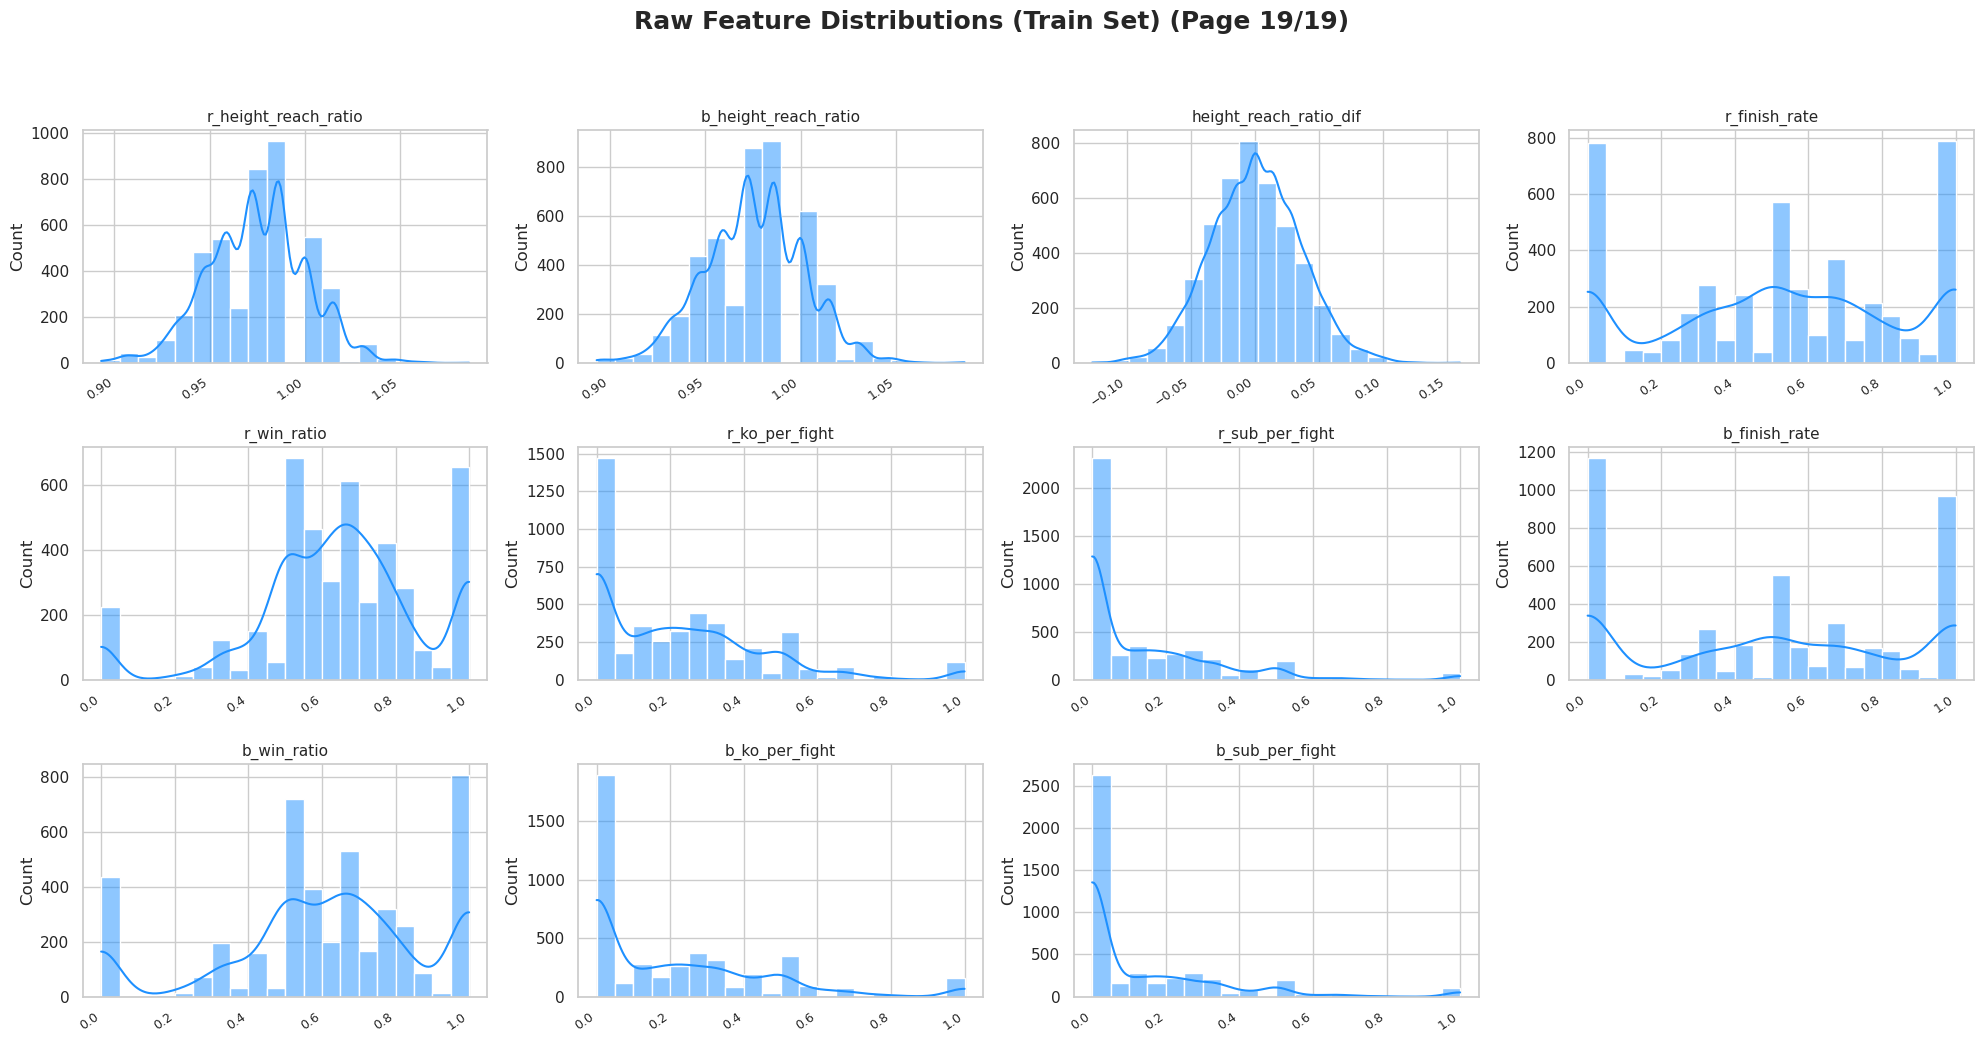

In [17]:
ufc_data.plot_feature_distributions(processed = False)

<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

# Save UFCData

In [20]:
# Save the cleaned file
ufc_df.to_csv(f'{project_root}/data/processed/ufc_df.csv', index=False)
logger.info("✅ ETL file saved as 'ufc_etl.csv'.")

[INFO] ✅ ETL file saved as 'ufc_etl.csv'.


In [19]:
path = "../data/processed/ufc_data.pkl"
with open(path, "wb") as f:
    pickle.dump(ufc_data, f)

<div style="text-align: center;">
     <img src="../img/ufc_logo.png" width="800" /> 
</div>